In [1]:
import numpy as np
import pandas as pd
from scipy.sparse import csr_matrix
from collections import defaultdict

In [2]:
lines = []

with open("data/train.dat", "r") as fh:
    lines = fh.readlines()

In [45]:
print(len(lines))

8580


In [4]:
val = []
ind = []
ptr = [0]
inddict = dict()

In [5]:
index = 0
for j in range(0, len(lines)):
    d = lines[j].split(" ")  
    for i in range(0, len(d), 2):        
        if not inddict.has_key(d[i]):
            inddict[d[i]]= index
            index+=1
        ind.append(inddict.get(d[i]))
        val.append(d[i+1])
    ptr.append(ptr[len(ptr)-1]+len(d)/2)
            

In [6]:
print(len(val))
print(len(ind))
print(len(ptr))

1107980
1107980
8581


In [7]:
print(val[:5])
print(ind[:5])
print(ptr[:5])
print(len(inddict))
# print(len(set(ind)))

['1', '1', '5', '3', '1']
[0, 1, 2, 3, 4]
[0, 139, 329, 558, 685]
27673


In [8]:
from scipy.sparse import csr_matrix

In [9]:
ncols = len(set(ind))
nrows = len(lines)
# mat = csr_matrix((val, ind, ptr), shape=(nrows, ncols), dtype=np.long)
mat = csr_matrix((val, ind, ptr), dtype=np.long)

In [10]:
print(mat.shape)
print("mat:", mat[:5,:20].todense(), "\n")

(8580, 27673)
('mat:', matrix([[1, 1, 5, 3, 1, 4, 1, 1, 1, 1, 4, 2, 1, 1, 2, 1, 3, 1, 1, 2],
        [0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 1, 1],
        [1, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 2, 0, 0, 0, 1, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0],
        [0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 1, 0, 0, 0, 0]]), '\n')


In [11]:
from sklearn.decomposition import TruncatedSVD

In [12]:
svd = TruncatedSVD(n_components=30, n_iter=7, random_state=42)
reduced_mat = svd.fit_transform(mat)

[ 0.04791594  0.04009878  0.03145457  0.02190533  0.01758347  0.01635778
  0.01434289  0.01369484  0.0123993   0.01176616  0.00965456  0.00906043
  0.00854551  0.00794115  0.00713774  0.00684414  0.006632    0.00618468
  0.00581106  0.0056094   0.0055371   0.00521735  0.00500018  0.00479569
  0.00474543  0.00451184  0.00434651  0.00421513  0.00419353  0.00400211]
[ 28.54663434  23.88944644  18.73952536  13.05042439  10.47561304
   9.74538837   8.54499305   8.15890379   7.38706615   7.00986551
   5.75184627   5.39788468   5.09111179   4.73105554   4.25241521
   4.07749764   3.95111014   3.68461602   3.46202655   3.34188223
   3.29881062   3.10831341   2.97893096   2.85710452   2.82715884
   2.68799341   2.58949909   2.51122825   2.49836044   2.38431748]


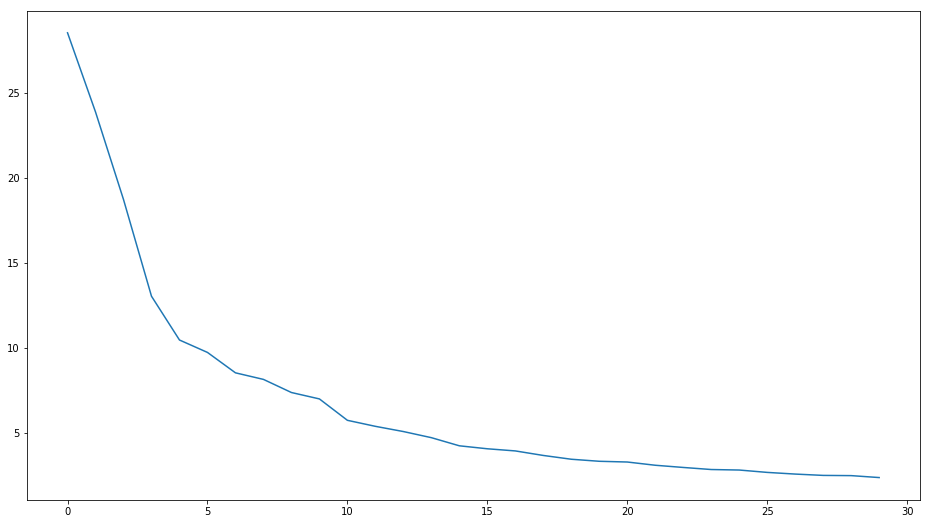

In [13]:
variance = svd.explained_variance_
ratio = svd.explained_variance_ratio_
print(ratio)
print(variance)

import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = [16,9]
plt.plot(variance)
plt.show()

In [14]:
print(type(reduced_mat))
print(reduced_mat.shape)
print(reduced_mat[:2])

<type 'numpy.ndarray'>
(8580, 30)
[[  5.22421399e+00  -1.69908480e-01  -2.41072906e+00   9.17849086e-01
   -4.65836099e-01  -3.20595469e+00   1.07926500e+00   1.59989875e+00
    8.31090690e-01   3.15161895e-04   4.61053234e-01   2.48207897e-01
   -1.49060762e+00   1.34867694e+00  -6.65985867e-01   7.50367175e-01
   -9.50673874e-01   4.24807978e+00   2.16130025e-01   1.11884848e+00
   -2.22093573e-01   4.72155848e-02  -9.94434603e-01  -7.83624275e-01
    5.00214655e-01   5.45477174e-01  -2.28734120e+00  -1.74236956e+00
   -3.51466056e-01   3.12065232e-01]
 [  6.18168944e+00   1.86858101e+00  -1.92683191e+00  -5.52162035e-01
    2.65974280e-01  -3.05095449e-01   3.00298270e-01   1.02449243e+00
    7.51706079e-01   9.77739746e-01  -1.95531873e-01   1.20248708e+00
    2.49938588e-01   1.52459046e+00   8.15273241e-01   1.97948023e+00
   -1.04630309e-01   7.48198055e-01  -5.90363550e-01   5.72123134e-02
    3.98966629e-01   7.04395604e-01  -4.28809345e-01   3.23028311e-02
    6.05341250e-01 

In [15]:
svd = TruncatedSVD(n_components=8, n_iter=7, random_state=42)
reduced_mat = svd.fit_transform(mat)

In [16]:
print(type(reduced_mat))
print(reduced_mat.shape)
print(reduced_mat[:5])

<type 'numpy.ndarray'>
(8580, 8)
[[ 5.22421399 -0.16990824 -2.41071843  0.9180287  -0.46603179 -3.20733732
   1.08285299  1.58982401]
 [ 6.18168944  1.86858116 -1.92682861 -0.55214062  0.26580993 -0.30544721
   0.30061966  1.02169305]
 [ 9.24230421 -0.31318343 -3.98860835 -0.05335948 -1.60296547 -2.78094796
  -0.11246927  2.75044079]
 [ 5.70227677  0.14190261 -2.2650484   1.1025105  -0.10268622 -3.06279373
   1.74931939  0.91289557]
 [ 8.00970611  1.6299051  -4.24033613  0.7110995  -1.25973415 -4.28798813
   1.21963885  0.92973001]]


In [17]:
from scipy.spatial.distance import pdist, squareform

In [18]:
dist_mat1 = pdist(reduced_mat, metric='euclidean')
dist_mat = squareform(dist_mat1)

In [19]:
print(dist_mat.shape)

(8580, 8580)


In [76]:
dist_mat[:5,:5]

array([[ 0.        ,  4.16640921,  4.88356029,  1.19847643,  4.07931601],
       [ 4.16640921,  0.        ,  5.60417831,  3.98908953,  5.42103996],
       [ 4.88356029,  5.60417831,  0.        ,  5.12041954,  3.66348647],
       [ 1.19847643,  3.98908953,  5.12041954,  0.        ,  3.83588997],
       [ 4.07931601,  5.42103996,  3.66348647,  3.83588997,  0.        ]])

In [21]:
# def findkNeibour(k):
#     list = []
#     for row in dist_mat:
#         row.sort()
# #         list.append(row[1:k+1])
#         list.append(row[1:])
#     return list
# #     print(row.tolist().sort())

In [22]:
# list_k1 = findkNeibour(2)

In [23]:
# import matplotlib.pyplot as plt
# plt.plot(list_k1)
# plt.show()

In [24]:
from sklearn.preprocessing import normalize

In [25]:
# norm_dist_mat= normalize(dist_mat, norm='l2')

In [26]:
# print(norm_dist_mat.shape)

In [27]:
dist_mat_sorted = dist_mat.copy()
# norm_dist_mat_sorted = norm_dist_mat.copy()

In [28]:
for row in dist_mat_sorted:
    row.sort()


In [29]:
print(dist_mat_sorted.shape)

(8580, 8580)


In [30]:
# def findkNeibour(k):
#     list = []
#     for row in norm_dist_mat_copy:
#         row.sort()
# #         list.append(row[1:k+1])
#         list.append(row[1:k+1])
#     return list
# #     print(row.tolist().sort())

In [31]:
# list_k1 = findkNeibour(1)

In [32]:
# plt.rcParams["figure.figsize"] = [16,9]
# sorted(list_k1)
# plt.plot(list_k1)
# plt.show()

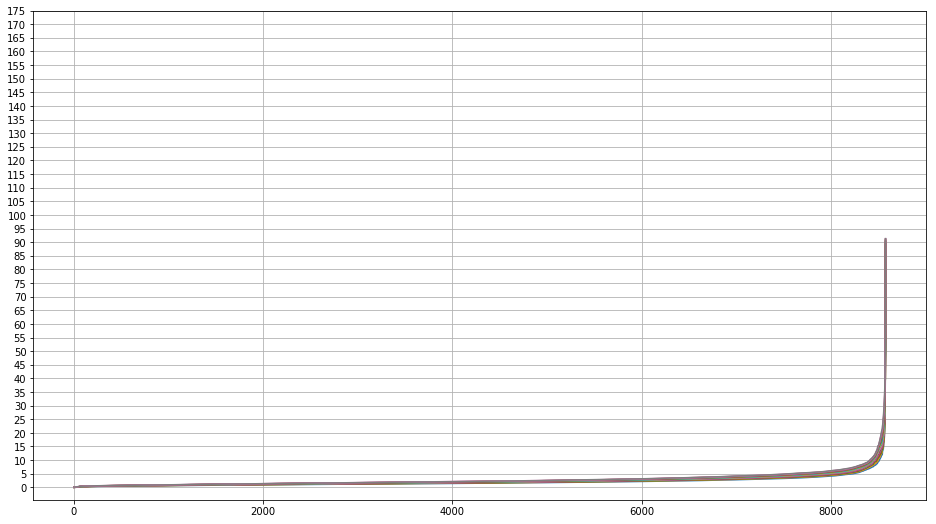

In [33]:
fig = plt.figure()
plt.rcParams["figure.figsize"] = [15,9]



for i in range(3, 21):
    temp = sorted(row[i] for row in dist_mat_sorted)
    plt.plot(temp)

x_axis = fig.gca()
x_axis.set_yticks(np.arange(0, 180, 5))
    
# for i in range(0,200,10):
#     plt.axhline(i, color='r', linestyle='-')
plt.grid(True)
plt.show()

In [49]:
eps = 3.5
density = 15
print(dist_mat_sorted.shape)


(8580, 8580)


In [50]:
def find_Core_Points(eps, density):
    visited_dict = {}
    unvisited_dict = {}
    for j in range(0, len(dist_mat_sorted)):
        count = 0
        if dist_mat_sorted[j][density]<=eps:            
            visited_dict[j] = 0
        else:
            unvisited_dict[j] = 0
    return list,visited_dict, unvisited_dict

In [51]:
doc_core_list, visited_dict, unvisited_dict = find_Core_Points(eps, density)

20
3


In [52]:
print(len(doc_core_list))
print(len(visited_dict))
print(len(unvisited_dict))
count1 = 0
count0 = 0
for i in doc_core_list:
    if i==0:
        count0+=1
    elif i==1:
        count1+=1
print("count of 1: ", count1)
print("count of 0: ", count0)

8580
5813
2767
('count of 1: ', 5813)
('count of 0: ', 2767)


In [53]:
def compute_euclidean_dist(a, b):
    return np.linalg.norm(a-b)

In [54]:
cluster = defaultdict(list)

In [55]:
# cluster_index = 0
# for k in sorted(visited_dict.keys()):
# # for i in range(0, len(dist_mat)):
#     if visited_dict.get(k)==0:
#         print("For Cluster Index: ", cluster_index, " for k : ", k, " value: ", visited_dict.get(k))
#         tempSet = [k]
#         for i in sorted(visited_dict.keys()):            
#             if visited_dict[i]==0:
#                 print("For core point: ", i)
#                 for j in range(i+1, len(dist_mat[i])):
#                     if visited_dict.get(j)==0:
#                         dist = compute_euclidean_dist(dist_mat[i][1], dist_mat[i][j])
# #                         print("dist", dist)
#                         if dist<=eps:
#                             tempSet.append(j)
#                             visited_dict[j] = 1
#         cluster[cluster_index].extend(tempSet)
#         cluster_index+=1
index1 = 0 

In [56]:

def defineClusterPoints(k, flag=False):
    if flag:        
        temp_set = []
    else:
        temp_set = [k]
#     print(visited_dict.keys())
    for i in sorted(visited_dict.keys()):
#         print("before i: ", i , k,  visited_dict.get(i))
        if visited_dict.get(i)==0:
#             dist = compute_euclidean_dist(dist_mat[k][1], dist_mat[k][i])
            
#             if dist<=eps:
#             print("k:  ", k, "i:  ", i, " dist: ", dist[k][i], "eps: ", eps)
            if(dist_mat[k][i]<=eps):
                temp_set.append(i)
#                 index1=index1+1
#                 print("Total docs in cluster: ", index1)
                visited_dict[i] = 1
                print("value change: ", visited_dict[i])
                print("after i: ", i, k,   visited_dict.get(i))

#                 print(k, "  ", visited_dict[k])
    return temp_set         
#         cluster[cluster_index].extend(tempSet
#                     if visited_dict.get(j)==0:
#                         dist = compute_euclidean_dist(dist_mat[i][1], dist_mat[i][j])
# #                         print("dist", dist)
#                         if dist<=eps:
#                             tempSet.append(j)
#                             visited_dict[j] = 1

In [57]:
def doesExistInCluster(k):
    for key in cluster.keys():
        if k in cluster.get(key):
            return True
    return False

In [58]:
cluster_index = 0
# for m in sorted(visited_dict.keys()):
len_mat = len(dist_mat)
for k in sorted(visited_dict.keys()):
# for i in range(0, len(dist_mat)): 

#     print("Cluster Index ", cluster_index)
    if visited_dict.get(k)==0:        
        print("Non Visited ", k)
        temp_set = []
        temp_set = list(set(defineClusterPoints(k, False)))
        cluster[cluster_index] = temp_set
#         print ("Cluster Index: ", cluster_index, "   cluster length: ", len(cluster[cluster_index]))
        cluster_index+=1
#         visited_dict[k]=1
        print(k, "  ", visited_dict[k])
    else:
#         print("Visited ", k)
        for key in cluster.keys():
            if doesExistInCluster(k):                    
                temp_set = list(set(defineClusterPoints(k, True)))
                temp_set_old = cluster.get(key)
                temp_set_old.extend(temp_set)
                cluster[key] = list(set(temp_set_old))
    print ("k: ", k, "Cluster Index: ", cluster_index, "   cluster length: ", len(cluster[cluster_index-1]))
                    
#     print(visited_dict)
    

('Non Visited ', 0)
('value change: ', 1)
('after i: ', 0, 0, 1)
('value change: ', 1)
('after i: ', 3, 0, 1)
('value change: ', 1)
('after i: ', 8, 0, 1)
('value change: ', 1)
('after i: ', 9, 0, 1)
('value change: ', 1)
('after i: ', 10, 0, 1)
('value change: ', 1)
('after i: ', 12, 0, 1)
('value change: ', 1)
('after i: ', 14, 0, 1)
('value change: ', 1)
('after i: ', 18, 0, 1)
('value change: ', 1)
('after i: ', 19, 0, 1)
('value change: ', 1)
('after i: ', 54, 0, 1)
('value change: ', 1)
('after i: ', 56, 0, 1)
('value change: ', 1)
('after i: ', 64, 0, 1)
('value change: ', 1)
('after i: ', 69, 0, 1)
('value change: ', 1)
('after i: ', 72, 0, 1)
('value change: ', 1)
('after i: ', 75, 0, 1)
('value change: ', 1)
('after i: ', 78, 0, 1)
('value change: ', 1)
('after i: ', 82, 0, 1)
('value change: ', 1)
('after i: ', 83, 0, 1)
('value change: ', 1)
('after i: ', 92, 0, 1)
('value change: ', 1)
('after i: ', 99, 0, 1)
('value change: ', 1)
('after i: ', 109, 0, 1)
('value change: '

('value change: ', 1)
('after i: ', 1435, 7, 1)
('value change: ', 1)
('after i: ', 1436, 7, 1)
('value change: ', 1)
('after i: ', 1441, 7, 1)
('value change: ', 1)
('after i: ', 1442, 7, 1)
('value change: ', 1)
('after i: ', 1446, 7, 1)
('value change: ', 1)
('after i: ', 1447, 7, 1)
('value change: ', 1)
('after i: ', 1455, 7, 1)
('value change: ', 1)
('after i: ', 1457, 7, 1)
('value change: ', 1)
('after i: ', 1469, 7, 1)
('value change: ', 1)
('after i: ', 1474, 7, 1)
('value change: ', 1)
('after i: ', 1478, 7, 1)
('value change: ', 1)
('after i: ', 1483, 7, 1)
('value change: ', 1)
('after i: ', 1484, 7, 1)
('value change: ', 1)
('after i: ', 1486, 7, 1)
('value change: ', 1)
('after i: ', 1491, 7, 1)
('value change: ', 1)
('after i: ', 1496, 7, 1)
('value change: ', 1)
('after i: ', 1506, 7, 1)
('value change: ', 1)
('after i: ', 1508, 7, 1)
('value change: ', 1)
('after i: ', 1514, 7, 1)
('value change: ', 1)
('after i: ', 1521, 7, 1)
('value change: ', 1)
('after i: ', 1524

('after i: ', 6168, 7, 1)
('value change: ', 1)
('after i: ', 6176, 7, 1)
('value change: ', 1)
('after i: ', 6187, 7, 1)
('value change: ', 1)
('after i: ', 6188, 7, 1)
('value change: ', 1)
('after i: ', 6189, 7, 1)
('value change: ', 1)
('after i: ', 6215, 7, 1)
('value change: ', 1)
('after i: ', 6217, 7, 1)
('value change: ', 1)
('after i: ', 6227, 7, 1)
('value change: ', 1)
('after i: ', 6238, 7, 1)
('value change: ', 1)
('after i: ', 6247, 7, 1)
('value change: ', 1)
('after i: ', 6258, 7, 1)
('value change: ', 1)
('after i: ', 6262, 7, 1)
('value change: ', 1)
('after i: ', 6263, 7, 1)
('value change: ', 1)
('after i: ', 6271, 7, 1)
('value change: ', 1)
('after i: ', 6274, 7, 1)
('value change: ', 1)
('after i: ', 6276, 7, 1)
('value change: ', 1)
('after i: ', 6281, 7, 1)
('value change: ', 1)
('after i: ', 6282, 7, 1)
('value change: ', 1)
('after i: ', 6288, 7, 1)
('value change: ', 1)
('after i: ', 6289, 7, 1)
('value change: ', 1)
('after i: ', 6291, 7, 1)
('value change

('value change: ', 1)
('after i: ', 8168, 7, 1)
('value change: ', 1)
('after i: ', 8171, 7, 1)
('value change: ', 1)
('after i: ', 8173, 7, 1)
('value change: ', 1)
('after i: ', 8175, 7, 1)
('value change: ', 1)
('after i: ', 8177, 7, 1)
('value change: ', 1)
('after i: ', 8178, 7, 1)
('value change: ', 1)
('after i: ', 8186, 7, 1)
('value change: ', 1)
('after i: ', 8189, 7, 1)
('value change: ', 1)
('after i: ', 8191, 7, 1)
('value change: ', 1)
('after i: ', 8196, 7, 1)
('value change: ', 1)
('after i: ', 8198, 7, 1)
('value change: ', 1)
('after i: ', 8199, 7, 1)
('value change: ', 1)
('after i: ', 8201, 7, 1)
('value change: ', 1)
('after i: ', 8202, 7, 1)
('value change: ', 1)
('after i: ', 8204, 7, 1)
('value change: ', 1)
('after i: ', 8205, 7, 1)
('value change: ', 1)
('after i: ', 8206, 7, 1)
('value change: ', 1)
('after i: ', 8207, 7, 1)
('value change: ', 1)
('after i: ', 8208, 7, 1)
('value change: ', 1)
('after i: ', 8211, 7, 1)
('value change: ', 1)
('after i: ', 8212

('after i: ', 2634, 15, 1)
('value change: ', 1)
('after i: ', 2693, 15, 1)
('value change: ', 1)
('after i: ', 2711, 15, 1)
('value change: ', 1)
('after i: ', 2849, 15, 1)
('value change: ', 1)
('after i: ', 2856, 15, 1)
('value change: ', 1)
('after i: ', 2891, 15, 1)
('value change: ', 1)
('after i: ', 2936, 15, 1)
('value change: ', 1)
('after i: ', 2947, 15, 1)
('value change: ', 1)
('after i: ', 2977, 15, 1)
('value change: ', 1)
('after i: ', 3178, 15, 1)
('value change: ', 1)
('after i: ', 4834, 15, 1)
('value change: ', 1)
('after i: ', 5807, 15, 1)
('value change: ', 1)
('after i: ', 6051, 15, 1)
('value change: ', 1)
('after i: ', 6232, 15, 1)
('value change: ', 1)
('after i: ', 6842, 15, 1)
('value change: ', 1)
('after i: ', 6850, 15, 1)
('value change: ', 1)
('after i: ', 6928, 15, 1)
('value change: ', 1)
('after i: ', 6958, 15, 1)
('value change: ', 1)
('after i: ', 6976, 15, 1)
('value change: ', 1)
('after i: ', 7025, 15, 1)
('k: ', 15, 'Cluster Index: ', 7, '   clus

('after i: ', 7166, 21, 1)
('value change: ', 1)
('after i: ', 7180, 21, 1)
('value change: ', 1)
('after i: ', 7183, 21, 1)
('value change: ', 1)
('after i: ', 7185, 21, 1)
('value change: ', 1)
('after i: ', 7195, 21, 1)
('value change: ', 1)
('after i: ', 7218, 21, 1)
('value change: ', 1)
('after i: ', 7222, 21, 1)
('value change: ', 1)
('after i: ', 7227, 21, 1)
('value change: ', 1)
('after i: ', 7247, 21, 1)
('value change: ', 1)
('after i: ', 7258, 21, 1)
('value change: ', 1)
('after i: ', 7274, 21, 1)
('value change: ', 1)
('after i: ', 7292, 21, 1)
('value change: ', 1)
('after i: ', 7308, 21, 1)
('value change: ', 1)
('after i: ', 7369, 21, 1)
('value change: ', 1)
('after i: ', 7398, 21, 1)
('value change: ', 1)
('after i: ', 7403, 21, 1)
('value change: ', 1)
('after i: ', 7405, 21, 1)
('value change: ', 1)
('after i: ', 7425, 21, 1)
('value change: ', 1)
('after i: ', 7441, 21, 1)
('value change: ', 1)
('after i: ', 7461, 21, 1)
('value change: ', 1)
('after i: ', 7478, 

('value change: ', 1)
('after i: ', 8158, 57, 1)
('value change: ', 1)
('after i: ', 8160, 57, 1)
('value change: ', 1)
('after i: ', 8180, 57, 1)
('value change: ', 1)
('after i: ', 8227, 57, 1)
('value change: ', 1)
('after i: ', 8262, 57, 1)
('value change: ', 1)
('after i: ', 8361, 57, 1)
('value change: ', 1)
('after i: ', 8405, 57, 1)
('value change: ', 1)
('after i: ', 8411, 57, 1)
('value change: ', 1)
('after i: ', 8504, 57, 1)
('value change: ', 1)
('after i: ', 8509, 57, 1)
('value change: ', 1)
('after i: ', 8510, 57, 1)
('value change: ', 1)
('after i: ', 8511, 57, 1)
(57, '  ', 1)
('k: ', 57, 'Cluster Index: ', 10, '   cluster length: ', 96)
('k: ', 58, 'Cluster Index: ', 10, '   cluster length: ', 96)
('k: ', 59, 'Cluster Index: ', 10, '   cluster length: ', 96)
('value change: ', 1)
('after i: ', 90, 60, 1)
('value change: ', 1)
('after i: ', 316, 60, 1)
('value change: ', 1)
('after i: ', 503, 60, 1)
('value change: ', 1)
('after i: ', 574, 60, 1)
('value change: ', 1)

('after i: ', 7246, 95, 1)
('value change: ', 1)
('after i: ', 7283, 95, 1)
('value change: ', 1)
('after i: ', 7295, 95, 1)
('value change: ', 1)
('after i: ', 7351, 95, 1)
('value change: ', 1)
('after i: ', 7353, 95, 1)
('value change: ', 1)
('after i: ', 7378, 95, 1)
('value change: ', 1)
('after i: ', 7469, 95, 1)
('value change: ', 1)
('after i: ', 7491, 95, 1)
('value change: ', 1)
('after i: ', 7851, 95, 1)
('value change: ', 1)
('after i: ', 8355, 95, 1)
('k: ', 95, 'Cluster Index: ', 13, '   cluster length: ', 7)
('value change: ', 1)
('after i: ', 7551, 98, 1)
('value change: ', 1)
('after i: ', 7555, 98, 1)
('value change: ', 1)
('after i: ', 7709, 98, 1)
('k: ', 98, 'Cluster Index: ', 13, '   cluster length: ', 7)
('k: ', 99, 'Cluster Index: ', 13, '   cluster length: ', 7)
('k: ', 101, 'Cluster Index: ', 13, '   cluster length: ', 7)
('value change: ', 1)
('after i: ', 3907, 102, 1)
('value change: ', 1)
('after i: ', 3918, 102, 1)
('value change: ', 1)
('after i: ', 3926

('after i: ', 1886, 204, 1)
('value change: ', 1)
('after i: ', 2002, 204, 1)
('value change: ', 1)
('after i: ', 2385, 204, 1)
('value change: ', 1)
('after i: ', 2508, 204, 1)
('value change: ', 1)
('after i: ', 2525, 204, 1)
('value change: ', 1)
('after i: ', 2576, 204, 1)
(204, '  ', 1)
('k: ', 204, 'Cluster Index: ', 16, '   cluster length: ', 18)
('value change: ', 1)
('after i: ', 4388, 205, 1)
('value change: ', 1)
('after i: ', 4424, 205, 1)
('value change: ', 1)
('after i: ', 5464, 205, 1)
('value change: ', 1)
('after i: ', 7384, 205, 1)
('value change: ', 1)
('after i: ', 7849, 205, 1)
('k: ', 205, 'Cluster Index: ', 16, '   cluster length: ', 18)
('k: ', 208, 'Cluster Index: ', 16, '   cluster length: ', 18)
('value change: ', 1)
('after i: ', 253, 210, 1)
('value change: ', 1)
('after i: ', 366, 210, 1)
('value change: ', 1)
('after i: ', 430, 210, 1)
('value change: ', 1)
('after i: ', 506, 210, 1)
('value change: ', 1)
('after i: ', 517, 210, 1)
('value change: ', 1)
(

('after i: ', 1428, 312, 1)
('value change: ', 1)
('after i: ', 1468, 312, 1)
('value change: ', 1)
('after i: ', 1587, 312, 1)
('value change: ', 1)
('after i: ', 1716, 312, 1)
('value change: ', 1)
('after i: ', 1785, 312, 1)
('value change: ', 1)
('after i: ', 1896, 312, 1)
('value change: ', 1)
('after i: ', 1949, 312, 1)
('value change: ', 1)
('after i: ', 1995, 312, 1)
('value change: ', 1)
('after i: ', 2017, 312, 1)
('value change: ', 1)
('after i: ', 2072, 312, 1)
('value change: ', 1)
('after i: ', 2144, 312, 1)
('value change: ', 1)
('after i: ', 2183, 312, 1)
('value change: ', 1)
('after i: ', 2231, 312, 1)
('value change: ', 1)
('after i: ', 2328, 312, 1)
('value change: ', 1)
('after i: ', 2362, 312, 1)
('value change: ', 1)
('after i: ', 2368, 312, 1)
('value change: ', 1)
('after i: ', 2373, 312, 1)
('value change: ', 1)
('after i: ', 2471, 312, 1)
('value change: ', 1)
('after i: ', 2480, 312, 1)
('value change: ', 1)
('after i: ', 2507, 312, 1)
('value change: ', 1)


('k: ', 355, 'Cluster Index: ', 17, '   cluster length: ', 31)
('k: ', 356, 'Cluster Index: ', 17, '   cluster length: ', 31)
('value change: ', 1)
('after i: ', 1289, 357, 1)
('value change: ', 1)
('after i: ', 2031, 357, 1)
('value change: ', 1)
('after i: ', 2034, 357, 1)
('value change: ', 1)
('after i: ', 2336, 357, 1)
('k: ', 357, 'Cluster Index: ', 17, '   cluster length: ', 31)
('value change: ', 1)
('after i: ', 3491, 359, 1)
('value change: ', 1)
('after i: ', 7319, 359, 1)
('k: ', 359, 'Cluster Index: ', 17, '   cluster length: ', 31)
('Non Visited ', 361)
('value change: ', 1)
('after i: ', 361, 361, 1)
('value change: ', 1)
('after i: ', 743, 361, 1)
('value change: ', 1)
('after i: ', 811, 361, 1)
('value change: ', 1)
('after i: ', 875, 361, 1)
('value change: ', 1)
('after i: ', 1459, 361, 1)
('value change: ', 1)
('after i: ', 1903, 361, 1)
('value change: ', 1)
('after i: ', 2008, 361, 1)
('value change: ', 1)
('after i: ', 2025, 361, 1)
('value change: ', 1)
('after 

('k: ', 410, 'Cluster Index: ', 20, '   cluster length: ', 21)
('k: ', 411, 'Cluster Index: ', 20, '   cluster length: ', 21)
('Non Visited ', 412)
('value change: ', 1)
('after i: ', 412, 412, 1)
('value change: ', 1)
('after i: ', 680, 412, 1)
('value change: ', 1)
('after i: ', 790, 412, 1)
('value change: ', 1)
('after i: ', 803, 412, 1)
('value change: ', 1)
('after i: ', 1101, 412, 1)
('value change: ', 1)
('after i: ', 1168, 412, 1)
('value change: ', 1)
('after i: ', 1352, 412, 1)
('value change: ', 1)
('after i: ', 1505, 412, 1)
('value change: ', 1)
('after i: ', 1523, 412, 1)
('value change: ', 1)
('after i: ', 1705, 412, 1)
('value change: ', 1)
('after i: ', 1727, 412, 1)
('value change: ', 1)
('after i: ', 1751, 412, 1)
('value change: ', 1)
('after i: ', 2136, 412, 1)
('value change: ', 1)
('after i: ', 2206, 412, 1)
('value change: ', 1)
('after i: ', 2414, 412, 1)
('value change: ', 1)
('after i: ', 2437, 412, 1)
('value change: ', 1)
('after i: ', 2457, 412, 1)
('valu

('after i: ', 4480, 473, 1)
('value change: ', 1)
('after i: ', 4503, 473, 1)
('value change: ', 1)
('after i: ', 5102, 473, 1)
('value change: ', 1)
('after i: ', 5171, 473, 1)
('value change: ', 1)
('after i: ', 5390, 473, 1)
('value change: ', 1)
('after i: ', 5639, 473, 1)
('k: ', 473, 'Cluster Index: ', 22, '   cluster length: ', 19)
('k: ', 474, 'Cluster Index: ', 22, '   cluster length: ', 19)
('k: ', 475, 'Cluster Index: ', 22, '   cluster length: ', 19)
('k: ', 476, 'Cluster Index: ', 22, '   cluster length: ', 19)
('k: ', 480, 'Cluster Index: ', 22, '   cluster length: ', 19)
('k: ', 481, 'Cluster Index: ', 22, '   cluster length: ', 19)
('k: ', 487, 'Cluster Index: ', 22, '   cluster length: ', 19)
('k: ', 489, 'Cluster Index: ', 22, '   cluster length: ', 19)
('value change: ', 1)
('after i: ', 557, 490, 1)
('value change: ', 1)
('after i: ', 639, 490, 1)
('value change: ', 1)
('after i: ', 727, 490, 1)
('value change: ', 1)
('after i: ', 877, 490, 1)
('value change: ', 1)


('k: ', 580, 'Cluster Index: ', 23, '   cluster length: ', 9)
('k: ', 581, 'Cluster Index: ', 23, '   cluster length: ', 9)
('k: ', 582, 'Cluster Index: ', 23, '   cluster length: ', 9)
('k: ', 583, 'Cluster Index: ', 23, '   cluster length: ', 9)
('k: ', 585, 'Cluster Index: ', 23, '   cluster length: ', 9)
('k: ', 587, 'Cluster Index: ', 23, '   cluster length: ', 9)
('k: ', 589, 'Cluster Index: ', 23, '   cluster length: ', 9)
('k: ', 590, 'Cluster Index: ', 23, '   cluster length: ', 9)
('k: ', 592, 'Cluster Index: ', 23, '   cluster length: ', 9)
('k: ', 594, 'Cluster Index: ', 23, '   cluster length: ', 9)
('k: ', 596, 'Cluster Index: ', 23, '   cluster length: ', 9)
('k: ', 597, 'Cluster Index: ', 23, '   cluster length: ', 9)
('k: ', 598, 'Cluster Index: ', 23, '   cluster length: ', 9)
('value change: ', 1)
('after i: ', 1011, 599, 1)
('value change: ', 1)
('after i: ', 1075, 599, 1)
('value change: ', 1)
('after i: ', 1661, 599, 1)
('k: ', 599, 'Cluster Index: ', 23, '   clus

('k: ', 735, 'Cluster Index: ', 24, '   cluster length: ', 1)
('k: ', 736, 'Cluster Index: ', 24, '   cluster length: ', 1)
('k: ', 738, 'Cluster Index: ', 24, '   cluster length: ', 1)
('k: ', 739, 'Cluster Index: ', 24, '   cluster length: ', 1)
('k: ', 741, 'Cluster Index: ', 24, '   cluster length: ', 1)
('k: ', 742, 'Cluster Index: ', 24, '   cluster length: ', 1)
('k: ', 743, 'Cluster Index: ', 24, '   cluster length: ', 1)
('k: ', 747, 'Cluster Index: ', 24, '   cluster length: ', 1)
('k: ', 748, 'Cluster Index: ', 24, '   cluster length: ', 1)
('k: ', 749, 'Cluster Index: ', 24, '   cluster length: ', 1)
('k: ', 750, 'Cluster Index: ', 24, '   cluster length: ', 1)
('k: ', 751, 'Cluster Index: ', 24, '   cluster length: ', 1)
('k: ', 752, 'Cluster Index: ', 24, '   cluster length: ', 1)
('k: ', 754, 'Cluster Index: ', 24, '   cluster length: ', 1)
('k: ', 755, 'Cluster Index: ', 24, '   cluster length: ', 1)
('k: ', 756, 'Cluster Index: ', 24, '   cluster length: ', 1)
('k: ', 

('k: ', 892, 'Cluster Index: ', 24, '   cluster length: ', 1)
('k: ', 893, 'Cluster Index: ', 24, '   cluster length: ', 1)
('k: ', 895, 'Cluster Index: ', 24, '   cluster length: ', 1)
('k: ', 897, 'Cluster Index: ', 24, '   cluster length: ', 1)
('k: ', 898, 'Cluster Index: ', 24, '   cluster length: ', 1)
('k: ', 899, 'Cluster Index: ', 24, '   cluster length: ', 1)
('k: ', 900, 'Cluster Index: ', 24, '   cluster length: ', 1)
('k: ', 901, 'Cluster Index: ', 24, '   cluster length: ', 1)
('k: ', 902, 'Cluster Index: ', 24, '   cluster length: ', 1)
('value change: ', 1)
('after i: ', 2215, 903, 1)
('value change: ', 1)
('after i: ', 2813, 903, 1)
('k: ', 903, 'Cluster Index: ', 24, '   cluster length: ', 1)
('k: ', 904, 'Cluster Index: ', 24, '   cluster length: ', 1)
('k: ', 908, 'Cluster Index: ', 24, '   cluster length: ', 1)
('k: ', 909, 'Cluster Index: ', 24, '   cluster length: ', 1)
('k: ', 910, 'Cluster Index: ', 24, '   cluster length: ', 1)
('value change: ', 1)
('after i:

('k: ', 1052, 'Cluster Index: ', 24, '   cluster length: ', 1)
('k: ', 1053, 'Cluster Index: ', 24, '   cluster length: ', 1)
('k: ', 1054, 'Cluster Index: ', 24, '   cluster length: ', 1)
('k: ', 1055, 'Cluster Index: ', 24, '   cluster length: ', 1)
('k: ', 1057, 'Cluster Index: ', 24, '   cluster length: ', 1)
('k: ', 1059, 'Cluster Index: ', 24, '   cluster length: ', 1)
('k: ', 1061, 'Cluster Index: ', 24, '   cluster length: ', 1)
('value change: ', 1)
('after i: ', 4318, 1062, 1)
('value change: ', 1)
('after i: ', 4753, 1062, 1)
('value change: ', 1)
('after i: ', 5666, 1062, 1)
('value change: ', 1)
('after i: ', 5845, 1062, 1)
('value change: ', 1)
('after i: ', 8455, 1062, 1)
('value change: ', 1)
('after i: ', 8546, 1062, 1)
('k: ', 1062, 'Cluster Index: ', 24, '   cluster length: ', 1)
('k: ', 1064, 'Cluster Index: ', 24, '   cluster length: ', 1)
('k: ', 1066, 'Cluster Index: ', 24, '   cluster length: ', 1)
('k: ', 1067, 'Cluster Index: ', 24, '   cluster length: ', 1)
(

('k: ', 1224, 'Cluster Index: ', 24, '   cluster length: ', 1)
('k: ', 1225, 'Cluster Index: ', 24, '   cluster length: ', 1)
('k: ', 1227, 'Cluster Index: ', 24, '   cluster length: ', 1)
('k: ', 1229, 'Cluster Index: ', 24, '   cluster length: ', 1)
('k: ', 1230, 'Cluster Index: ', 24, '   cluster length: ', 1)
('k: ', 1231, 'Cluster Index: ', 24, '   cluster length: ', 1)
('k: ', 1234, 'Cluster Index: ', 24, '   cluster length: ', 1)
('k: ', 1235, 'Cluster Index: ', 24, '   cluster length: ', 1)
('k: ', 1236, 'Cluster Index: ', 24, '   cluster length: ', 1)
('k: ', 1238, 'Cluster Index: ', 24, '   cluster length: ', 1)
('k: ', 1239, 'Cluster Index: ', 24, '   cluster length: ', 1)
('k: ', 1240, 'Cluster Index: ', 24, '   cluster length: ', 1)
('k: ', 1241, 'Cluster Index: ', 24, '   cluster length: ', 1)
('k: ', 1242, 'Cluster Index: ', 24, '   cluster length: ', 1)
('k: ', 1243, 'Cluster Index: ', 24, '   cluster length: ', 1)
('k: ', 1244, 'Cluster Index: ', 24, '   cluster length

('k: ', 1373, 'Cluster Index: ', 24, '   cluster length: ', 1)
('k: ', 1374, 'Cluster Index: ', 24, '   cluster length: ', 1)
('k: ', 1375, 'Cluster Index: ', 24, '   cluster length: ', 1)
('k: ', 1376, 'Cluster Index: ', 24, '   cluster length: ', 1)
('k: ', 1377, 'Cluster Index: ', 24, '   cluster length: ', 1)
('k: ', 1378, 'Cluster Index: ', 24, '   cluster length: ', 1)
('k: ', 1379, 'Cluster Index: ', 24, '   cluster length: ', 1)
('k: ', 1380, 'Cluster Index: ', 24, '   cluster length: ', 1)
('k: ', 1382, 'Cluster Index: ', 24, '   cluster length: ', 1)
('k: ', 1383, 'Cluster Index: ', 24, '   cluster length: ', 1)
('k: ', 1384, 'Cluster Index: ', 24, '   cluster length: ', 1)
('k: ', 1386, 'Cluster Index: ', 24, '   cluster length: ', 1)
('k: ', 1388, 'Cluster Index: ', 24, '   cluster length: ', 1)
('k: ', 1389, 'Cluster Index: ', 24, '   cluster length: ', 1)
('k: ', 1392, 'Cluster Index: ', 24, '   cluster length: ', 1)
('value change: ', 1)
('after i: ', 3799, 1393, 1)
('k:

('k: ', 1525, 'Cluster Index: ', 24, '   cluster length: ', 1)
('k: ', 1526, 'Cluster Index: ', 24, '   cluster length: ', 1)
('k: ', 1527, 'Cluster Index: ', 24, '   cluster length: ', 1)
('k: ', 1528, 'Cluster Index: ', 24, '   cluster length: ', 1)
('k: ', 1532, 'Cluster Index: ', 24, '   cluster length: ', 1)
('k: ', 1533, 'Cluster Index: ', 24, '   cluster length: ', 1)
('k: ', 1534, 'Cluster Index: ', 24, '   cluster length: ', 1)
('k: ', 1535, 'Cluster Index: ', 24, '   cluster length: ', 1)
('k: ', 1541, 'Cluster Index: ', 24, '   cluster length: ', 1)
('k: ', 1542, 'Cluster Index: ', 24, '   cluster length: ', 1)
('k: ', 1544, 'Cluster Index: ', 24, '   cluster length: ', 1)
('k: ', 1545, 'Cluster Index: ', 24, '   cluster length: ', 1)
('value change: ', 1)
('after i: ', 7200, 1548, 1)
('value change: ', 1)
('after i: ', 7489, 1548, 1)
('value change: ', 1)
('after i: ', 7496, 1548, 1)
('value change: ', 1)
('after i: ', 7616, 1548, 1)
('value change: ', 1)
('after i: ', 7622

('k: ', 1712, 'Cluster Index: ', 24, '   cluster length: ', 1)
('k: ', 1714, 'Cluster Index: ', 24, '   cluster length: ', 1)
('k: ', 1715, 'Cluster Index: ', 24, '   cluster length: ', 1)
('k: ', 1716, 'Cluster Index: ', 24, '   cluster length: ', 1)
('k: ', 1718, 'Cluster Index: ', 24, '   cluster length: ', 1)
('k: ', 1720, 'Cluster Index: ', 24, '   cluster length: ', 1)
('k: ', 1721, 'Cluster Index: ', 24, '   cluster length: ', 1)
('k: ', 1722, 'Cluster Index: ', 24, '   cluster length: ', 1)
('k: ', 1723, 'Cluster Index: ', 24, '   cluster length: ', 1)
('value change: ', 1)
('after i: ', 4868, 1725, 1)
('value change: ', 1)
('after i: ', 8036, 1725, 1)
('value change: ', 1)
('after i: ', 8086, 1725, 1)
('k: ', 1725, 'Cluster Index: ', 24, '   cluster length: ', 1)
('k: ', 1726, 'Cluster Index: ', 24, '   cluster length: ', 1)
('k: ', 1727, 'Cluster Index: ', 24, '   cluster length: ', 1)
('k: ', 1728, 'Cluster Index: ', 24, '   cluster length: ', 1)
('k: ', 1729, 'Cluster Index

('k: ', 1894, 'Cluster Index: ', 24, '   cluster length: ', 1)
('k: ', 1895, 'Cluster Index: ', 24, '   cluster length: ', 1)
('k: ', 1896, 'Cluster Index: ', 24, '   cluster length: ', 1)
('k: ', 1897, 'Cluster Index: ', 24, '   cluster length: ', 1)
('k: ', 1898, 'Cluster Index: ', 24, '   cluster length: ', 1)
('k: ', 1899, 'Cluster Index: ', 24, '   cluster length: ', 1)
('k: ', 1900, 'Cluster Index: ', 24, '   cluster length: ', 1)
('k: ', 1902, 'Cluster Index: ', 24, '   cluster length: ', 1)
('k: ', 1903, 'Cluster Index: ', 24, '   cluster length: ', 1)
('k: ', 1904, 'Cluster Index: ', 24, '   cluster length: ', 1)
('k: ', 1907, 'Cluster Index: ', 24, '   cluster length: ', 1)
('k: ', 1908, 'Cluster Index: ', 24, '   cluster length: ', 1)
('k: ', 1909, 'Cluster Index: ', 24, '   cluster length: ', 1)
('k: ', 1912, 'Cluster Index: ', 24, '   cluster length: ', 1)
('k: ', 1913, 'Cluster Index: ', 24, '   cluster length: ', 1)
('value change: ', 1)
('after i: ', 3528, 1914, 1)
('va

('k: ', 2072, 'Cluster Index: ', 24, '   cluster length: ', 1)
('k: ', 2074, 'Cluster Index: ', 24, '   cluster length: ', 1)
('k: ', 2076, 'Cluster Index: ', 24, '   cluster length: ', 1)
('k: ', 2077, 'Cluster Index: ', 24, '   cluster length: ', 1)
('k: ', 2079, 'Cluster Index: ', 24, '   cluster length: ', 1)
('k: ', 2080, 'Cluster Index: ', 24, '   cluster length: ', 1)
('k: ', 2081, 'Cluster Index: ', 24, '   cluster length: ', 1)
('k: ', 2082, 'Cluster Index: ', 24, '   cluster length: ', 1)
('k: ', 2083, 'Cluster Index: ', 24, '   cluster length: ', 1)
('k: ', 2084, 'Cluster Index: ', 24, '   cluster length: ', 1)
('k: ', 2085, 'Cluster Index: ', 24, '   cluster length: ', 1)
('k: ', 2088, 'Cluster Index: ', 24, '   cluster length: ', 1)
('k: ', 2089, 'Cluster Index: ', 24, '   cluster length: ', 1)
('k: ', 2090, 'Cluster Index: ', 24, '   cluster length: ', 1)
('k: ', 2091, 'Cluster Index: ', 24, '   cluster length: ', 1)
('k: ', 2092, 'Cluster Index: ', 24, '   cluster length

('k: ', 2250, 'Cluster Index: ', 24, '   cluster length: ', 1)
('k: ', 2251, 'Cluster Index: ', 24, '   cluster length: ', 1)
('k: ', 2253, 'Cluster Index: ', 24, '   cluster length: ', 1)
('k: ', 2254, 'Cluster Index: ', 24, '   cluster length: ', 1)
('k: ', 2256, 'Cluster Index: ', 24, '   cluster length: ', 1)
('k: ', 2257, 'Cluster Index: ', 24, '   cluster length: ', 1)
('k: ', 2258, 'Cluster Index: ', 24, '   cluster length: ', 1)
('k: ', 2261, 'Cluster Index: ', 24, '   cluster length: ', 1)
('k: ', 2264, 'Cluster Index: ', 24, '   cluster length: ', 1)
('k: ', 2266, 'Cluster Index: ', 24, '   cluster length: ', 1)
('k: ', 2267, 'Cluster Index: ', 24, '   cluster length: ', 1)
('k: ', 2269, 'Cluster Index: ', 24, '   cluster length: ', 1)
('k: ', 2270, 'Cluster Index: ', 24, '   cluster length: ', 1)
('k: ', 2271, 'Cluster Index: ', 24, '   cluster length: ', 1)
('k: ', 2272, 'Cluster Index: ', 24, '   cluster length: ', 1)
('k: ', 2273, 'Cluster Index: ', 24, '   cluster length

('k: ', 2409, 'Cluster Index: ', 24, '   cluster length: ', 1)
('k: ', 2410, 'Cluster Index: ', 24, '   cluster length: ', 1)
('k: ', 2411, 'Cluster Index: ', 24, '   cluster length: ', 1)
('k: ', 2412, 'Cluster Index: ', 24, '   cluster length: ', 1)
('k: ', 2413, 'Cluster Index: ', 24, '   cluster length: ', 1)
('k: ', 2414, 'Cluster Index: ', 24, '   cluster length: ', 1)
('k: ', 2416, 'Cluster Index: ', 24, '   cluster length: ', 1)
('k: ', 2417, 'Cluster Index: ', 24, '   cluster length: ', 1)
('k: ', 2419, 'Cluster Index: ', 24, '   cluster length: ', 1)
('k: ', 2420, 'Cluster Index: ', 24, '   cluster length: ', 1)
('k: ', 2421, 'Cluster Index: ', 24, '   cluster length: ', 1)
('k: ', 2422, 'Cluster Index: ', 24, '   cluster length: ', 1)
('k: ', 2423, 'Cluster Index: ', 24, '   cluster length: ', 1)
('value change: ', 1)
('after i: ', 3621, 2424, 1)
('value change: ', 1)
('after i: ', 3901, 2424, 1)
('value change: ', 1)
('after i: ', 3916, 2424, 1)
('value change: ', 1)
('afte

('k: ', 2570, 'Cluster Index: ', 24, '   cluster length: ', 1)
('k: ', 2571, 'Cluster Index: ', 24, '   cluster length: ', 1)
('k: ', 2572, 'Cluster Index: ', 24, '   cluster length: ', 1)
('k: ', 2576, 'Cluster Index: ', 24, '   cluster length: ', 1)
('k: ', 2579, 'Cluster Index: ', 24, '   cluster length: ', 1)
('k: ', 2580, 'Cluster Index: ', 24, '   cluster length: ', 1)
('k: ', 2581, 'Cluster Index: ', 24, '   cluster length: ', 1)
('k: ', 2583, 'Cluster Index: ', 24, '   cluster length: ', 1)
('k: ', 2585, 'Cluster Index: ', 24, '   cluster length: ', 1)
('k: ', 2586, 'Cluster Index: ', 24, '   cluster length: ', 1)
('k: ', 2587, 'Cluster Index: ', 24, '   cluster length: ', 1)
('k: ', 2589, 'Cluster Index: ', 24, '   cluster length: ', 1)
('k: ', 2590, 'Cluster Index: ', 24, '   cluster length: ', 1)
('k: ', 2591, 'Cluster Index: ', 24, '   cluster length: ', 1)
('k: ', 2593, 'Cluster Index: ', 24, '   cluster length: ', 1)
('k: ', 2594, 'Cluster Index: ', 24, '   cluster length

('k: ', 2750, 'Cluster Index: ', 24, '   cluster length: ', 1)
('value change: ', 1)
('after i: ', 4925, 2752, 1)
('value change: ', 1)
('after i: ', 5792, 2752, 1)
('value change: ', 1)
('after i: ', 5844, 2752, 1)
('value change: ', 1)
('after i: ', 5910, 2752, 1)
('value change: ', 1)
('after i: ', 6696, 2752, 1)
('k: ', 2752, 'Cluster Index: ', 24, '   cluster length: ', 1)
('k: ', 2753, 'Cluster Index: ', 24, '   cluster length: ', 1)
('k: ', 2754, 'Cluster Index: ', 24, '   cluster length: ', 1)
('k: ', 2755, 'Cluster Index: ', 24, '   cluster length: ', 1)
('k: ', 2757, 'Cluster Index: ', 24, '   cluster length: ', 1)
('k: ', 2758, 'Cluster Index: ', 24, '   cluster length: ', 1)
('k: ', 2761, 'Cluster Index: ', 24, '   cluster length: ', 1)
('k: ', 2762, 'Cluster Index: ', 24, '   cluster length: ', 1)
('k: ', 2763, 'Cluster Index: ', 24, '   cluster length: ', 1)
('k: ', 2766, 'Cluster Index: ', 24, '   cluster length: ', 1)
('value change: ', 1)
('after i: ', 3512, 2767, 1)
(

('k: ', 2947, 'Cluster Index: ', 24, '   cluster length: ', 1)
('k: ', 2950, 'Cluster Index: ', 24, '   cluster length: ', 1)
('k: ', 2952, 'Cluster Index: ', 24, '   cluster length: ', 1)
('k: ', 2961, 'Cluster Index: ', 24, '   cluster length: ', 1)
('k: ', 2967, 'Cluster Index: ', 24, '   cluster length: ', 1)
('k: ', 2970, 'Cluster Index: ', 24, '   cluster length: ', 1)
('k: ', 2972, 'Cluster Index: ', 24, '   cluster length: ', 1)
('k: ', 2973, 'Cluster Index: ', 24, '   cluster length: ', 1)
('k: ', 2974, 'Cluster Index: ', 24, '   cluster length: ', 1)
('k: ', 2976, 'Cluster Index: ', 24, '   cluster length: ', 1)
('k: ', 2977, 'Cluster Index: ', 24, '   cluster length: ', 1)
('k: ', 2978, 'Cluster Index: ', 24, '   cluster length: ', 1)
('k: ', 2981, 'Cluster Index: ', 24, '   cluster length: ', 1)
('k: ', 2983, 'Cluster Index: ', 24, '   cluster length: ', 1)
('k: ', 2985, 'Cluster Index: ', 24, '   cluster length: ', 1)
('k: ', 2986, 'Cluster Index: ', 24, '   cluster length

('value change: ', 1)
('after i: ', 5458, 3136, 1)
('value change: ', 1)
('after i: ', 5698, 3136, 1)
('value change: ', 1)
('after i: ', 6040, 3136, 1)
('value change: ', 1)
('after i: ', 6109, 3136, 1)
('value change: ', 1)
('after i: ', 6409, 3136, 1)
('value change: ', 1)
('after i: ', 8135, 3136, 1)
('k: ', 3136, 'Cluster Index: ', 24, '   cluster length: ', 1)
('k: ', 3137, 'Cluster Index: ', 24, '   cluster length: ', 1)
('k: ', 3138, 'Cluster Index: ', 24, '   cluster length: ', 1)
('k: ', 3139, 'Cluster Index: ', 24, '   cluster length: ', 1)
('k: ', 3143, 'Cluster Index: ', 24, '   cluster length: ', 1)
('value change: ', 1)
('after i: ', 4819, 3147, 1)
('value change: ', 1)
('after i: ', 4900, 3147, 1)
('value change: ', 1)
('after i: ', 5098, 3147, 1)
('value change: ', 1)
('after i: ', 6034, 3147, 1)
('value change: ', 1)
('after i: ', 6499, 3147, 1)
('value change: ', 1)
('after i: ', 6800, 3147, 1)
('k: ', 3147, 'Cluster Index: ', 24, '   cluster length: ', 1)
('k: ', 31

('k: ', 3324, 'Cluster Index: ', 24, '   cluster length: ', 1)
('k: ', 3325, 'Cluster Index: ', 24, '   cluster length: ', 1)
('k: ', 3326, 'Cluster Index: ', 24, '   cluster length: ', 1)
('k: ', 3327, 'Cluster Index: ', 24, '   cluster length: ', 1)
('k: ', 3330, 'Cluster Index: ', 24, '   cluster length: ', 1)
('k: ', 3332, 'Cluster Index: ', 24, '   cluster length: ', 1)
('k: ', 3333, 'Cluster Index: ', 24, '   cluster length: ', 1)
('k: ', 3335, 'Cluster Index: ', 24, '   cluster length: ', 1)
('k: ', 3337, 'Cluster Index: ', 24, '   cluster length: ', 1)
('k: ', 3338, 'Cluster Index: ', 24, '   cluster length: ', 1)
('k: ', 3339, 'Cluster Index: ', 24, '   cluster length: ', 1)
('k: ', 3340, 'Cluster Index: ', 24, '   cluster length: ', 1)
('k: ', 3341, 'Cluster Index: ', 24, '   cluster length: ', 1)
('k: ', 3342, 'Cluster Index: ', 24, '   cluster length: ', 1)
('k: ', 3344, 'Cluster Index: ', 24, '   cluster length: ', 1)
('k: ', 3345, 'Cluster Index: ', 24, '   cluster length

('value change: ', 1)
('after i: ', 7885, 3422, 1)
('k: ', 3422, 'Cluster Index: ', 25, '   cluster length: ', 116)
('value change: ', 1)
('after i: ', 3431, 3423, 1)
('value change: ', 1)
('after i: ', 4120, 3423, 1)
('value change: ', 1)
('after i: ', 5596, 3423, 1)
('k: ', 3423, 'Cluster Index: ', 25, '   cluster length: ', 116)
('Non Visited ', 3424)
('value change: ', 1)
('after i: ', 3424, 3424, 1)
('value change: ', 1)
('after i: ', 3462, 3424, 1)
('value change: ', 1)
('after i: ', 3500, 3424, 1)
('value change: ', 1)
('after i: ', 3623, 3424, 1)
('value change: ', 1)
('after i: ', 3644, 3424, 1)
('value change: ', 1)
('after i: ', 4116, 3424, 1)
('value change: ', 1)
('after i: ', 4161, 3424, 1)
('value change: ', 1)
('after i: ', 4241, 3424, 1)
('value change: ', 1)
('after i: ', 4461, 3424, 1)
('value change: ', 1)
('after i: ', 4692, 3424, 1)
(3424, '  ', 1)
('k: ', 3424, 'Cluster Index: ', 26, '   cluster length: ', 10)
('k: ', 3425, 'Cluster Index: ', 26, '   cluster leng

('k: ', 3474, 'Cluster Index: ', 33, '   cluster length: ', 20)
('k: ', 3475, 'Cluster Index: ', 33, '   cluster length: ', 20)
('value change: ', 1)
('after i: ', 3504, 3476, 1)
('value change: ', 1)
('after i: ', 3706, 3476, 1)
('value change: ', 1)
('after i: ', 3909, 3476, 1)
('value change: ', 1)
('after i: ', 4647, 3476, 1)
('k: ', 3476, 'Cluster Index: ', 33, '   cluster length: ', 20)
('k: ', 3477, 'Cluster Index: ', 33, '   cluster length: ', 20)
('k: ', 3478, 'Cluster Index: ', 33, '   cluster length: ', 20)
('k: ', 3479, 'Cluster Index: ', 33, '   cluster length: ', 20)
('k: ', 3481, 'Cluster Index: ', 33, '   cluster length: ', 20)
('value change: ', 1)
('after i: ', 4312, 3483, 1)
('value change: ', 1)
('after i: ', 7204, 3483, 1)
('value change: ', 1)
('after i: ', 7328, 3483, 1)
('value change: ', 1)
('after i: ', 7394, 3483, 1)
('k: ', 3483, 'Cluster Index: ', 33, '   cluster length: ', 20)
('k: ', 3484, 'Cluster Index: ', 33, '   cluster length: ', 20)
('value change: 

('k: ', 3585, 'Cluster Index: ', 34, '   cluster length: ', 9)
('value change: ', 1)
('after i: ', 7975, 3586, 1)
('k: ', 3586, 'Cluster Index: ', 34, '   cluster length: ', 9)
('value change: ', 1)
('after i: ', 7742, 3590, 1)
('k: ', 3590, 'Cluster Index: ', 34, '   cluster length: ', 9)
('k: ', 3592, 'Cluster Index: ', 34, '   cluster length: ', 9)
('value change: ', 1)
('after i: ', 6937, 3593, 1)
('k: ', 3593, 'Cluster Index: ', 34, '   cluster length: ', 9)
('k: ', 3596, 'Cluster Index: ', 34, '   cluster length: ', 9)
('k: ', 3598, 'Cluster Index: ', 34, '   cluster length: ', 9)
('k: ', 3600, 'Cluster Index: ', 34, '   cluster length: ', 9)
('k: ', 3601, 'Cluster Index: ', 34, '   cluster length: ', 9)
('value change: ', 1)
('after i: ', 7877, 3602, 1)
('k: ', 3602, 'Cluster Index: ', 34, '   cluster length: ', 9)
('k: ', 3603, 'Cluster Index: ', 34, '   cluster length: ', 9)
('k: ', 3604, 'Cluster Index: ', 34, '   cluster length: ', 9)
('k: ', 3606, 'Cluster Index: ', 34, '  

('k: ', 3685, 'Cluster Index: ', 35, '   cluster length: ', 43)
('k: ', 3686, 'Cluster Index: ', 35, '   cluster length: ', 43)
('k: ', 3687, 'Cluster Index: ', 35, '   cluster length: ', 43)
('k: ', 3688, 'Cluster Index: ', 35, '   cluster length: ', 43)
('k: ', 3689, 'Cluster Index: ', 35, '   cluster length: ', 43)
('k: ', 3690, 'Cluster Index: ', 35, '   cluster length: ', 43)
('k: ', 3695, 'Cluster Index: ', 35, '   cluster length: ', 43)
('k: ', 3696, 'Cluster Index: ', 35, '   cluster length: ', 43)
('k: ', 3698, 'Cluster Index: ', 35, '   cluster length: ', 43)
('k: ', 3699, 'Cluster Index: ', 35, '   cluster length: ', 43)
('k: ', 3700, 'Cluster Index: ', 35, '   cluster length: ', 43)
('k: ', 3703, 'Cluster Index: ', 35, '   cluster length: ', 43)
('k: ', 3705, 'Cluster Index: ', 35, '   cluster length: ', 43)
('k: ', 3706, 'Cluster Index: ', 35, '   cluster length: ', 43)
('k: ', 3707, 'Cluster Index: ', 35, '   cluster length: ', 43)
('k: ', 3708, 'Cluster Index: ', 35, '  

('k: ', 3849, 'Cluster Index: ', 35, '   cluster length: ', 43)
('k: ', 3850, 'Cluster Index: ', 35, '   cluster length: ', 43)
('k: ', 3851, 'Cluster Index: ', 35, '   cluster length: ', 43)
('k: ', 3852, 'Cluster Index: ', 35, '   cluster length: ', 43)
('k: ', 3853, 'Cluster Index: ', 35, '   cluster length: ', 43)
('k: ', 3855, 'Cluster Index: ', 35, '   cluster length: ', 43)
('k: ', 3858, 'Cluster Index: ', 35, '   cluster length: ', 43)
('k: ', 3859, 'Cluster Index: ', 35, '   cluster length: ', 43)
('k: ', 3860, 'Cluster Index: ', 35, '   cluster length: ', 43)
('k: ', 3861, 'Cluster Index: ', 35, '   cluster length: ', 43)
('k: ', 3862, 'Cluster Index: ', 35, '   cluster length: ', 43)
('k: ', 3863, 'Cluster Index: ', 35, '   cluster length: ', 43)
('k: ', 3864, 'Cluster Index: ', 35, '   cluster length: ', 43)
('k: ', 3865, 'Cluster Index: ', 35, '   cluster length: ', 43)
('k: ', 3866, 'Cluster Index: ', 35, '   cluster length: ', 43)
('k: ', 3867, 'Cluster Index: ', 35, '  

('k: ', 4023, 'Cluster Index: ', 35, '   cluster length: ', 43)
('k: ', 4025, 'Cluster Index: ', 35, '   cluster length: ', 43)
('k: ', 4026, 'Cluster Index: ', 35, '   cluster length: ', 43)
('k: ', 4029, 'Cluster Index: ', 35, '   cluster length: ', 43)
('k: ', 4031, 'Cluster Index: ', 35, '   cluster length: ', 43)
('k: ', 4032, 'Cluster Index: ', 35, '   cluster length: ', 43)
('k: ', 4036, 'Cluster Index: ', 35, '   cluster length: ', 43)
('k: ', 4037, 'Cluster Index: ', 35, '   cluster length: ', 43)
('k: ', 4038, 'Cluster Index: ', 35, '   cluster length: ', 43)
('k: ', 4040, 'Cluster Index: ', 35, '   cluster length: ', 43)
('k: ', 4042, 'Cluster Index: ', 35, '   cluster length: ', 43)
('k: ', 4047, 'Cluster Index: ', 35, '   cluster length: ', 43)
('k: ', 4048, 'Cluster Index: ', 35, '   cluster length: ', 43)
('k: ', 4050, 'Cluster Index: ', 35, '   cluster length: ', 43)
('value change: ', 1)
('after i: ', 5467, 4051, 1)
('value change: ', 1)
('after i: ', 6254, 4051, 1)
('

('k: ', 4209, 'Cluster Index: ', 35, '   cluster length: ', 43)
('k: ', 4211, 'Cluster Index: ', 35, '   cluster length: ', 43)
('k: ', 4212, 'Cluster Index: ', 35, '   cluster length: ', 43)
('k: ', 4213, 'Cluster Index: ', 35, '   cluster length: ', 43)
('k: ', 4214, 'Cluster Index: ', 35, '   cluster length: ', 43)
('k: ', 4215, 'Cluster Index: ', 35, '   cluster length: ', 43)
('k: ', 4216, 'Cluster Index: ', 35, '   cluster length: ', 43)
('k: ', 4217, 'Cluster Index: ', 35, '   cluster length: ', 43)
('k: ', 4218, 'Cluster Index: ', 35, '   cluster length: ', 43)
('k: ', 4219, 'Cluster Index: ', 35, '   cluster length: ', 43)
('k: ', 4221, 'Cluster Index: ', 35, '   cluster length: ', 43)
('k: ', 4222, 'Cluster Index: ', 35, '   cluster length: ', 43)
('k: ', 4223, 'Cluster Index: ', 35, '   cluster length: ', 43)
('k: ', 4225, 'Cluster Index: ', 35, '   cluster length: ', 43)
('k: ', 4226, 'Cluster Index: ', 35, '   cluster length: ', 43)
('k: ', 4227, 'Cluster Index: ', 35, '  

('k: ', 4379, 'Cluster Index: ', 35, '   cluster length: ', 43)
('k: ', 4380, 'Cluster Index: ', 35, '   cluster length: ', 43)
('k: ', 4382, 'Cluster Index: ', 35, '   cluster length: ', 43)
('value change: ', 1)
('after i: ', 5732, 4383, 1)
('k: ', 4383, 'Cluster Index: ', 35, '   cluster length: ', 43)
('value change: ', 1)
('after i: ', 5541, 4384, 1)
('k: ', 4384, 'Cluster Index: ', 35, '   cluster length: ', 43)
('k: ', 4387, 'Cluster Index: ', 35, '   cluster length: ', 43)
('k: ', 4388, 'Cluster Index: ', 35, '   cluster length: ', 43)
('k: ', 4389, 'Cluster Index: ', 35, '   cluster length: ', 43)
('k: ', 4390, 'Cluster Index: ', 35, '   cluster length: ', 43)
('k: ', 4392, 'Cluster Index: ', 35, '   cluster length: ', 43)
('k: ', 4393, 'Cluster Index: ', 35, '   cluster length: ', 43)
('k: ', 4394, 'Cluster Index: ', 35, '   cluster length: ', 43)
('k: ', 4395, 'Cluster Index: ', 35, '   cluster length: ', 43)
('k: ', 4396, 'Cluster Index: ', 35, '   cluster length: ', 43)
('

('k: ', 4567, 'Cluster Index: ', 35, '   cluster length: ', 43)
('k: ', 4569, 'Cluster Index: ', 35, '   cluster length: ', 43)
('k: ', 4570, 'Cluster Index: ', 35, '   cluster length: ', 43)
('k: ', 4571, 'Cluster Index: ', 35, '   cluster length: ', 43)
('k: ', 4572, 'Cluster Index: ', 35, '   cluster length: ', 43)
('k: ', 4573, 'Cluster Index: ', 35, '   cluster length: ', 43)
('k: ', 4575, 'Cluster Index: ', 35, '   cluster length: ', 43)
('k: ', 4578, 'Cluster Index: ', 35, '   cluster length: ', 43)
('k: ', 4579, 'Cluster Index: ', 35, '   cluster length: ', 43)
('k: ', 4582, 'Cluster Index: ', 35, '   cluster length: ', 43)
('k: ', 4583, 'Cluster Index: ', 35, '   cluster length: ', 43)
('k: ', 4584, 'Cluster Index: ', 35, '   cluster length: ', 43)
('k: ', 4585, 'Cluster Index: ', 35, '   cluster length: ', 43)
('k: ', 4586, 'Cluster Index: ', 35, '   cluster length: ', 43)
('k: ', 4587, 'Cluster Index: ', 35, '   cluster length: ', 43)
('k: ', 4589, 'Cluster Index: ', 35, '  

('k: ', 4752, 'Cluster Index: ', 35, '   cluster length: ', 43)
('k: ', 4753, 'Cluster Index: ', 35, '   cluster length: ', 43)
('k: ', 4754, 'Cluster Index: ', 35, '   cluster length: ', 43)
('k: ', 4756, 'Cluster Index: ', 35, '   cluster length: ', 43)
('k: ', 4757, 'Cluster Index: ', 35, '   cluster length: ', 43)
('k: ', 4760, 'Cluster Index: ', 35, '   cluster length: ', 43)
('k: ', 4765, 'Cluster Index: ', 35, '   cluster length: ', 43)
('k: ', 4766, 'Cluster Index: ', 35, '   cluster length: ', 43)
('k: ', 4767, 'Cluster Index: ', 35, '   cluster length: ', 43)
('k: ', 4768, 'Cluster Index: ', 35, '   cluster length: ', 43)
('k: ', 4771, 'Cluster Index: ', 35, '   cluster length: ', 43)
('k: ', 4772, 'Cluster Index: ', 35, '   cluster length: ', 43)
('k: ', 4773, 'Cluster Index: ', 35, '   cluster length: ', 43)
('k: ', 4774, 'Cluster Index: ', 35, '   cluster length: ', 43)
('k: ', 4775, 'Cluster Index: ', 35, '   cluster length: ', 43)
('k: ', 4776, 'Cluster Index: ', 35, '  

('k: ', 4865, 'Cluster Index: ', 37, '   cluster length: ', 35)
('k: ', 4868, 'Cluster Index: ', 37, '   cluster length: ', 35)
('k: ', 4869, 'Cluster Index: ', 37, '   cluster length: ', 35)
('value change: ', 1)
('after i: ', 5020, 4870, 1)
('value change: ', 1)
('after i: ', 5032, 4870, 1)
('value change: ', 1)
('after i: ', 5111, 4870, 1)
('value change: ', 1)
('after i: ', 5170, 4870, 1)
('value change: ', 1)
('after i: ', 5395, 4870, 1)
('value change: ', 1)
('after i: ', 5668, 4870, 1)
('value change: ', 1)
('after i: ', 5780, 4870, 1)
('value change: ', 1)
('after i: ', 6380, 4870, 1)
('value change: ', 1)
('after i: ', 6936, 4870, 1)
('value change: ', 1)
('after i: ', 6980, 4870, 1)
('k: ', 4870, 'Cluster Index: ', 37, '   cluster length: ', 35)
('k: ', 4873, 'Cluster Index: ', 37, '   cluster length: ', 35)
('k: ', 4876, 'Cluster Index: ', 37, '   cluster length: ', 35)
('value change: ', 1)
('after i: ', 5776, 4881, 1)
('k: ', 4881, 'Cluster Index: ', 37, '   cluster length

('after i: ', 6863, 5026, 1)
('k: ', 5026, 'Cluster Index: ', 41, '   cluster length: ', 6)
('k: ', 5027, 'Cluster Index: ', 41, '   cluster length: ', 6)
('k: ', 5028, 'Cluster Index: ', 41, '   cluster length: ', 6)
('k: ', 5029, 'Cluster Index: ', 41, '   cluster length: ', 6)
('k: ', 5031, 'Cluster Index: ', 41, '   cluster length: ', 6)
('k: ', 5032, 'Cluster Index: ', 41, '   cluster length: ', 6)
('k: ', 5033, 'Cluster Index: ', 41, '   cluster length: ', 6)
('k: ', 5034, 'Cluster Index: ', 41, '   cluster length: ', 6)
('k: ', 5035, 'Cluster Index: ', 41, '   cluster length: ', 6)
('k: ', 5036, 'Cluster Index: ', 41, '   cluster length: ', 6)
('k: ', 5037, 'Cluster Index: ', 41, '   cluster length: ', 6)
('k: ', 5038, 'Cluster Index: ', 41, '   cluster length: ', 6)
('k: ', 5040, 'Cluster Index: ', 41, '   cluster length: ', 6)
('k: ', 5041, 'Cluster Index: ', 41, '   cluster length: ', 6)
('k: ', 5042, 'Cluster Index: ', 41, '   cluster length: ', 6)
('k: ', 5043, 'Cluster Ind

('k: ', 5245, 'Cluster Index: ', 41, '   cluster length: ', 6)
('k: ', 5249, 'Cluster Index: ', 41, '   cluster length: ', 6)
('k: ', 5252, 'Cluster Index: ', 41, '   cluster length: ', 6)
('k: ', 5258, 'Cluster Index: ', 41, '   cluster length: ', 6)
('k: ', 5259, 'Cluster Index: ', 41, '   cluster length: ', 6)
('k: ', 5261, 'Cluster Index: ', 41, '   cluster length: ', 6)
('k: ', 5262, 'Cluster Index: ', 41, '   cluster length: ', 6)
('k: ', 5266, 'Cluster Index: ', 41, '   cluster length: ', 6)
('k: ', 5268, 'Cluster Index: ', 41, '   cluster length: ', 6)
('k: ', 5271, 'Cluster Index: ', 41, '   cluster length: ', 6)
('k: ', 5274, 'Cluster Index: ', 41, '   cluster length: ', 6)
('k: ', 5275, 'Cluster Index: ', 41, '   cluster length: ', 6)
('k: ', 5276, 'Cluster Index: ', 41, '   cluster length: ', 6)
('k: ', 5277, 'Cluster Index: ', 41, '   cluster length: ', 6)
('k: ', 5279, 'Cluster Index: ', 41, '   cluster length: ', 6)
('k: ', 5280, 'Cluster Index: ', 41, '   cluster length

('k: ', 5458, 'Cluster Index: ', 41, '   cluster length: ', 6)
('k: ', 5459, 'Cluster Index: ', 41, '   cluster length: ', 6)
('k: ', 5463, 'Cluster Index: ', 41, '   cluster length: ', 6)
('k: ', 5464, 'Cluster Index: ', 41, '   cluster length: ', 6)
('k: ', 5465, 'Cluster Index: ', 41, '   cluster length: ', 6)
('k: ', 5466, 'Cluster Index: ', 41, '   cluster length: ', 6)
('k: ', 5467, 'Cluster Index: ', 41, '   cluster length: ', 6)
('k: ', 5468, 'Cluster Index: ', 41, '   cluster length: ', 6)
('k: ', 5469, 'Cluster Index: ', 41, '   cluster length: ', 6)
('k: ', 5471, 'Cluster Index: ', 41, '   cluster length: ', 6)
('k: ', 5472, 'Cluster Index: ', 41, '   cluster length: ', 6)
('k: ', 5473, 'Cluster Index: ', 41, '   cluster length: ', 6)
('k: ', 5476, 'Cluster Index: ', 41, '   cluster length: ', 6)
('k: ', 5477, 'Cluster Index: ', 41, '   cluster length: ', 6)
('k: ', 5478, 'Cluster Index: ', 41, '   cluster length: ', 6)
('k: ', 5479, 'Cluster Index: ', 41, '   cluster length

('k: ', 5673, 'Cluster Index: ', 41, '   cluster length: ', 6)
('k: ', 5677, 'Cluster Index: ', 41, '   cluster length: ', 6)
('k: ', 5678, 'Cluster Index: ', 41, '   cluster length: ', 6)
('value change: ', 1)
('after i: ', 6992, 5679, 1)
('k: ', 5679, 'Cluster Index: ', 41, '   cluster length: ', 6)
('k: ', 5680, 'Cluster Index: ', 41, '   cluster length: ', 6)
('k: ', 5683, 'Cluster Index: ', 41, '   cluster length: ', 6)
('k: ', 5685, 'Cluster Index: ', 41, '   cluster length: ', 6)
('k: ', 5688, 'Cluster Index: ', 41, '   cluster length: ', 6)
('k: ', 5690, 'Cluster Index: ', 41, '   cluster length: ', 6)
('k: ', 5691, 'Cluster Index: ', 41, '   cluster length: ', 6)
('k: ', 5695, 'Cluster Index: ', 41, '   cluster length: ', 6)
('k: ', 5698, 'Cluster Index: ', 41, '   cluster length: ', 6)
('k: ', 5700, 'Cluster Index: ', 41, '   cluster length: ', 6)
('k: ', 5703, 'Cluster Index: ', 41, '   cluster length: ', 6)
('k: ', 5704, 'Cluster Index: ', 41, '   cluster length: ', 6)
('k:

('k: ', 5905, 'Cluster Index: ', 41, '   cluster length: ', 6)
('k: ', 5906, 'Cluster Index: ', 41, '   cluster length: ', 6)
('k: ', 5907, 'Cluster Index: ', 41, '   cluster length: ', 6)
('k: ', 5909, 'Cluster Index: ', 41, '   cluster length: ', 6)
('k: ', 5910, 'Cluster Index: ', 41, '   cluster length: ', 6)
('k: ', 5911, 'Cluster Index: ', 41, '   cluster length: ', 6)
('k: ', 5912, 'Cluster Index: ', 41, '   cluster length: ', 6)
('k: ', 5913, 'Cluster Index: ', 41, '   cluster length: ', 6)
('k: ', 5914, 'Cluster Index: ', 41, '   cluster length: ', 6)
('k: ', 5915, 'Cluster Index: ', 41, '   cluster length: ', 6)
('k: ', 5916, 'Cluster Index: ', 41, '   cluster length: ', 6)
('k: ', 5917, 'Cluster Index: ', 41, '   cluster length: ', 6)
('k: ', 5918, 'Cluster Index: ', 41, '   cluster length: ', 6)
('k: ', 5919, 'Cluster Index: ', 41, '   cluster length: ', 6)
('k: ', 5920, 'Cluster Index: ', 41, '   cluster length: ', 6)
('k: ', 5922, 'Cluster Index: ', 41, '   cluster length

('k: ', 6135, 'Cluster Index: ', 41, '   cluster length: ', 6)
('k: ', 6136, 'Cluster Index: ', 41, '   cluster length: ', 6)
('k: ', 6137, 'Cluster Index: ', 41, '   cluster length: ', 6)
('k: ', 6139, 'Cluster Index: ', 41, '   cluster length: ', 6)
('k: ', 6141, 'Cluster Index: ', 41, '   cluster length: ', 6)
('k: ', 6144, 'Cluster Index: ', 41, '   cluster length: ', 6)
('k: ', 6145, 'Cluster Index: ', 41, '   cluster length: ', 6)
('k: ', 6150, 'Cluster Index: ', 41, '   cluster length: ', 6)
('k: ', 6151, 'Cluster Index: ', 41, '   cluster length: ', 6)
('k: ', 6153, 'Cluster Index: ', 41, '   cluster length: ', 6)
('k: ', 6154, 'Cluster Index: ', 41, '   cluster length: ', 6)
('k: ', 6156, 'Cluster Index: ', 41, '   cluster length: ', 6)
('k: ', 6158, 'Cluster Index: ', 41, '   cluster length: ', 6)
('k: ', 6161, 'Cluster Index: ', 41, '   cluster length: ', 6)
('k: ', 6162, 'Cluster Index: ', 41, '   cluster length: ', 6)
('k: ', 6163, 'Cluster Index: ', 41, '   cluster length

('k: ', 6386, 'Cluster Index: ', 42, '   cluster length: ', 9)
('k: ', 6387, 'Cluster Index: ', 42, '   cluster length: ', 9)
('k: ', 6389, 'Cluster Index: ', 42, '   cluster length: ', 9)
('k: ', 6390, 'Cluster Index: ', 42, '   cluster length: ', 9)
('k: ', 6392, 'Cluster Index: ', 42, '   cluster length: ', 9)
('k: ', 6394, 'Cluster Index: ', 42, '   cluster length: ', 9)
('k: ', 6395, 'Cluster Index: ', 42, '   cluster length: ', 9)
('k: ', 6397, 'Cluster Index: ', 42, '   cluster length: ', 9)
('k: ', 6399, 'Cluster Index: ', 42, '   cluster length: ', 9)
('k: ', 6400, 'Cluster Index: ', 42, '   cluster length: ', 9)
('k: ', 6401, 'Cluster Index: ', 42, '   cluster length: ', 9)
('k: ', 6402, 'Cluster Index: ', 42, '   cluster length: ', 9)
('k: ', 6403, 'Cluster Index: ', 42, '   cluster length: ', 9)
('k: ', 6404, 'Cluster Index: ', 42, '   cluster length: ', 9)
('k: ', 6405, 'Cluster Index: ', 42, '   cluster length: ', 9)
('k: ', 6406, 'Cluster Index: ', 42, '   cluster length

('k: ', 6552, 'Cluster Index: ', 42, '   cluster length: ', 9)
('k: ', 6553, 'Cluster Index: ', 42, '   cluster length: ', 9)
('k: ', 6555, 'Cluster Index: ', 42, '   cluster length: ', 9)
('k: ', 6556, 'Cluster Index: ', 42, '   cluster length: ', 9)
('k: ', 6557, 'Cluster Index: ', 42, '   cluster length: ', 9)
('k: ', 6558, 'Cluster Index: ', 42, '   cluster length: ', 9)
('k: ', 6562, 'Cluster Index: ', 42, '   cluster length: ', 9)
('k: ', 6564, 'Cluster Index: ', 42, '   cluster length: ', 9)
('k: ', 6565, 'Cluster Index: ', 42, '   cluster length: ', 9)
('k: ', 6566, 'Cluster Index: ', 42, '   cluster length: ', 9)
('k: ', 6567, 'Cluster Index: ', 42, '   cluster length: ', 9)
('k: ', 6568, 'Cluster Index: ', 42, '   cluster length: ', 9)
('k: ', 6569, 'Cluster Index: ', 42, '   cluster length: ', 9)
('k: ', 6570, 'Cluster Index: ', 42, '   cluster length: ', 9)
('k: ', 6571, 'Cluster Index: ', 42, '   cluster length: ', 9)
('k: ', 6572, 'Cluster Index: ', 42, '   cluster length

('k: ', 6726, 'Cluster Index: ', 42, '   cluster length: ', 9)
('k: ', 6727, 'Cluster Index: ', 42, '   cluster length: ', 9)
('k: ', 6728, 'Cluster Index: ', 42, '   cluster length: ', 9)
('k: ', 6729, 'Cluster Index: ', 42, '   cluster length: ', 9)
('k: ', 6730, 'Cluster Index: ', 42, '   cluster length: ', 9)
('k: ', 6731, 'Cluster Index: ', 42, '   cluster length: ', 9)
('k: ', 6732, 'Cluster Index: ', 42, '   cluster length: ', 9)
('k: ', 6733, 'Cluster Index: ', 42, '   cluster length: ', 9)
('k: ', 6734, 'Cluster Index: ', 42, '   cluster length: ', 9)
('k: ', 6735, 'Cluster Index: ', 42, '   cluster length: ', 9)
('k: ', 6736, 'Cluster Index: ', 42, '   cluster length: ', 9)
('k: ', 6737, 'Cluster Index: ', 42, '   cluster length: ', 9)
('k: ', 6738, 'Cluster Index: ', 42, '   cluster length: ', 9)
('k: ', 6740, 'Cluster Index: ', 42, '   cluster length: ', 9)
('k: ', 6741, 'Cluster Index: ', 42, '   cluster length: ', 9)
('k: ', 6742, 'Cluster Index: ', 42, '   cluster length

('k: ', 6982, 'Cluster Index: ', 42, '   cluster length: ', 9)
('k: ', 6983, 'Cluster Index: ', 42, '   cluster length: ', 9)
('k: ', 6984, 'Cluster Index: ', 42, '   cluster length: ', 9)
('k: ', 6985, 'Cluster Index: ', 42, '   cluster length: ', 9)
('k: ', 6988, 'Cluster Index: ', 42, '   cluster length: ', 9)
('k: ', 6989, 'Cluster Index: ', 42, '   cluster length: ', 9)
('k: ', 6991, 'Cluster Index: ', 42, '   cluster length: ', 9)
('k: ', 6992, 'Cluster Index: ', 42, '   cluster length: ', 9)
('k: ', 6993, 'Cluster Index: ', 42, '   cluster length: ', 9)
('k: ', 6995, 'Cluster Index: ', 42, '   cluster length: ', 9)
('k: ', 6996, 'Cluster Index: ', 42, '   cluster length: ', 9)
('k: ', 6997, 'Cluster Index: ', 42, '   cluster length: ', 9)
('k: ', 6998, 'Cluster Index: ', 42, '   cluster length: ', 9)
('k: ', 7000, 'Cluster Index: ', 42, '   cluster length: ', 9)
('k: ', 7001, 'Cluster Index: ', 42, '   cluster length: ', 9)
('k: ', 7003, 'Cluster Index: ', 42, '   cluster length

('value change: ', 1)
('after i: ', 7337, 7179, 1)
('value change: ', 1)
('after i: ', 7449, 7179, 1)
('value change: ', 1)
('after i: ', 7955, 7179, 1)
('k: ', 7179, 'Cluster Index: ', 46, '   cluster length: ', 7)
('k: ', 7180, 'Cluster Index: ', 46, '   cluster length: ', 7)
('Non Visited ', 7181)
('value change: ', 1)
('after i: ', 7181, 7181, 1)
('value change: ', 1)
('after i: ', 7232, 7181, 1)
('value change: ', 1)
('after i: ', 7285, 7181, 1)
('value change: ', 1)
('after i: ', 7383, 7181, 1)
('value change: ', 1)
('after i: ', 7399, 7181, 1)
('value change: ', 1)
('after i: ', 7424, 7181, 1)
('value change: ', 1)
('after i: ', 7442, 7181, 1)
('value change: ', 1)
('after i: ', 7450, 7181, 1)
('value change: ', 1)
('after i: ', 7470, 7181, 1)
('value change: ', 1)
('after i: ', 7547, 7181, 1)
('value change: ', 1)
('after i: ', 7779, 7181, 1)
('value change: ', 1)
('after i: ', 7784, 7181, 1)
('value change: ', 1)
('after i: ', 7876, 7181, 1)
('value change: ', 1)
('after i: ',

('k: ', 7478, 'Cluster Index: ', 47, '   cluster length: ', 18)
('k: ', 7479, 'Cluster Index: ', 47, '   cluster length: ', 18)
('k: ', 7480, 'Cluster Index: ', 47, '   cluster length: ', 18)
('k: ', 7483, 'Cluster Index: ', 47, '   cluster length: ', 18)
('k: ', 7484, 'Cluster Index: ', 47, '   cluster length: ', 18)
('k: ', 7485, 'Cluster Index: ', 47, '   cluster length: ', 18)
('k: ', 7487, 'Cluster Index: ', 47, '   cluster length: ', 18)
('k: ', 7489, 'Cluster Index: ', 47, '   cluster length: ', 18)
('k: ', 7491, 'Cluster Index: ', 47, '   cluster length: ', 18)
('k: ', 7493, 'Cluster Index: ', 47, '   cluster length: ', 18)
('k: ', 7494, 'Cluster Index: ', 47, '   cluster length: ', 18)
('k: ', 7495, 'Cluster Index: ', 47, '   cluster length: ', 18)
('k: ', 7496, 'Cluster Index: ', 47, '   cluster length: ', 18)
('k: ', 7498, 'Cluster Index: ', 47, '   cluster length: ', 18)
('k: ', 7500, 'Cluster Index: ', 47, '   cluster length: ', 18)
('k: ', 7501, 'Cluster Index: ', 47, '  

('k: ', 7717, 'Cluster Index: ', 47, '   cluster length: ', 18)
('k: ', 7719, 'Cluster Index: ', 47, '   cluster length: ', 18)
('k: ', 7721, 'Cluster Index: ', 47, '   cluster length: ', 18)
('k: ', 7722, 'Cluster Index: ', 47, '   cluster length: ', 18)
('k: ', 7724, 'Cluster Index: ', 47, '   cluster length: ', 18)
('k: ', 7726, 'Cluster Index: ', 47, '   cluster length: ', 18)
('k: ', 7732, 'Cluster Index: ', 47, '   cluster length: ', 18)
('k: ', 7733, 'Cluster Index: ', 47, '   cluster length: ', 18)
('k: ', 7734, 'Cluster Index: ', 47, '   cluster length: ', 18)
('k: ', 7738, 'Cluster Index: ', 47, '   cluster length: ', 18)
('k: ', 7739, 'Cluster Index: ', 47, '   cluster length: ', 18)
('k: ', 7740, 'Cluster Index: ', 47, '   cluster length: ', 18)
('k: ', 7742, 'Cluster Index: ', 47, '   cluster length: ', 18)
('k: ', 7746, 'Cluster Index: ', 47, '   cluster length: ', 18)
('k: ', 7747, 'Cluster Index: ', 47, '   cluster length: ', 18)
('k: ', 7748, 'Cluster Index: ', 47, '  

('k: ', 7919, 'Cluster Index: ', 47, '   cluster length: ', 18)
('k: ', 7920, 'Cluster Index: ', 47, '   cluster length: ', 18)
('k: ', 7921, 'Cluster Index: ', 47, '   cluster length: ', 18)
('k: ', 7922, 'Cluster Index: ', 47, '   cluster length: ', 18)
('k: ', 7923, 'Cluster Index: ', 47, '   cluster length: ', 18)
('k: ', 7925, 'Cluster Index: ', 47, '   cluster length: ', 18)
('k: ', 7926, 'Cluster Index: ', 47, '   cluster length: ', 18)
('k: ', 7927, 'Cluster Index: ', 47, '   cluster length: ', 18)
('k: ', 7928, 'Cluster Index: ', 47, '   cluster length: ', 18)
('k: ', 7929, 'Cluster Index: ', 47, '   cluster length: ', 18)
('k: ', 7930, 'Cluster Index: ', 47, '   cluster length: ', 18)
('k: ', 7931, 'Cluster Index: ', 47, '   cluster length: ', 18)
('k: ', 7932, 'Cluster Index: ', 47, '   cluster length: ', 18)
('k: ', 7933, 'Cluster Index: ', 47, '   cluster length: ', 18)
('k: ', 7934, 'Cluster Index: ', 47, '   cluster length: ', 18)
('k: ', 7936, 'Cluster Index: ', 47, '  

('k: ', 8071, 'Cluster Index: ', 47, '   cluster length: ', 18)
('k: ', 8072, 'Cluster Index: ', 47, '   cluster length: ', 18)
('k: ', 8073, 'Cluster Index: ', 47, '   cluster length: ', 18)
('k: ', 8074, 'Cluster Index: ', 47, '   cluster length: ', 18)
('k: ', 8075, 'Cluster Index: ', 47, '   cluster length: ', 18)
('k: ', 8076, 'Cluster Index: ', 47, '   cluster length: ', 18)
('k: ', 8077, 'Cluster Index: ', 47, '   cluster length: ', 18)
('k: ', 8078, 'Cluster Index: ', 47, '   cluster length: ', 18)
('k: ', 8079, 'Cluster Index: ', 47, '   cluster length: ', 18)
('k: ', 8080, 'Cluster Index: ', 47, '   cluster length: ', 18)
('k: ', 8081, 'Cluster Index: ', 47, '   cluster length: ', 18)
('k: ', 8082, 'Cluster Index: ', 47, '   cluster length: ', 18)
('k: ', 8083, 'Cluster Index: ', 47, '   cluster length: ', 18)
('k: ', 8084, 'Cluster Index: ', 47, '   cluster length: ', 18)
('k: ', 8086, 'Cluster Index: ', 47, '   cluster length: ', 18)
('k: ', 8087, 'Cluster Index: ', 47, '  

('k: ', 8203, 'Cluster Index: ', 47, '   cluster length: ', 18)
('k: ', 8204, 'Cluster Index: ', 47, '   cluster length: ', 18)
('k: ', 8205, 'Cluster Index: ', 47, '   cluster length: ', 18)
('k: ', 8206, 'Cluster Index: ', 47, '   cluster length: ', 18)
('k: ', 8207, 'Cluster Index: ', 47, '   cluster length: ', 18)
('k: ', 8208, 'Cluster Index: ', 47, '   cluster length: ', 18)
('k: ', 8209, 'Cluster Index: ', 47, '   cluster length: ', 18)
('k: ', 8210, 'Cluster Index: ', 47, '   cluster length: ', 18)
('k: ', 8211, 'Cluster Index: ', 47, '   cluster length: ', 18)
('k: ', 8212, 'Cluster Index: ', 47, '   cluster length: ', 18)
('k: ', 8213, 'Cluster Index: ', 47, '   cluster length: ', 18)
('k: ', 8214, 'Cluster Index: ', 47, '   cluster length: ', 18)
('k: ', 8215, 'Cluster Index: ', 47, '   cluster length: ', 18)
('k: ', 8216, 'Cluster Index: ', 47, '   cluster length: ', 18)
('k: ', 8217, 'Cluster Index: ', 47, '   cluster length: ', 18)
('k: ', 8218, 'Cluster Index: ', 47, '  

('k: ', 8337, 'Cluster Index: ', 47, '   cluster length: ', 18)
('k: ', 8338, 'Cluster Index: ', 47, '   cluster length: ', 18)
('k: ', 8339, 'Cluster Index: ', 47, '   cluster length: ', 18)
('k: ', 8340, 'Cluster Index: ', 47, '   cluster length: ', 18)
('k: ', 8341, 'Cluster Index: ', 47, '   cluster length: ', 18)
('k: ', 8342, 'Cluster Index: ', 47, '   cluster length: ', 18)
('k: ', 8343, 'Cluster Index: ', 47, '   cluster length: ', 18)
('k: ', 8344, 'Cluster Index: ', 47, '   cluster length: ', 18)
('k: ', 8345, 'Cluster Index: ', 47, '   cluster length: ', 18)
('k: ', 8346, 'Cluster Index: ', 47, '   cluster length: ', 18)
('k: ', 8347, 'Cluster Index: ', 47, '   cluster length: ', 18)
('k: ', 8348, 'Cluster Index: ', 47, '   cluster length: ', 18)
('k: ', 8349, 'Cluster Index: ', 47, '   cluster length: ', 18)
('k: ', 8350, 'Cluster Index: ', 47, '   cluster length: ', 18)
('k: ', 8351, 'Cluster Index: ', 47, '   cluster length: ', 18)
('k: ', 8352, 'Cluster Index: ', 47, '  

('k: ', 8470, 'Cluster Index: ', 47, '   cluster length: ', 18)
('k: ', 8471, 'Cluster Index: ', 47, '   cluster length: ', 18)
('k: ', 8472, 'Cluster Index: ', 47, '   cluster length: ', 18)
('k: ', 8473, 'Cluster Index: ', 47, '   cluster length: ', 18)
('k: ', 8474, 'Cluster Index: ', 47, '   cluster length: ', 18)
('k: ', 8475, 'Cluster Index: ', 47, '   cluster length: ', 18)
('k: ', 8476, 'Cluster Index: ', 47, '   cluster length: ', 18)
('k: ', 8477, 'Cluster Index: ', 47, '   cluster length: ', 18)
('k: ', 8478, 'Cluster Index: ', 47, '   cluster length: ', 18)
('k: ', 8479, 'Cluster Index: ', 47, '   cluster length: ', 18)
('k: ', 8480, 'Cluster Index: ', 47, '   cluster length: ', 18)
('k: ', 8481, 'Cluster Index: ', 47, '   cluster length: ', 18)
('k: ', 8482, 'Cluster Index: ', 47, '   cluster length: ', 18)
('k: ', 8483, 'Cluster Index: ', 47, '   cluster length: ', 18)
('k: ', 8486, 'Cluster Index: ', 47, '   cluster length: ', 18)
('k: ', 8487, 'Cluster Index: ', 47, '  

In [59]:
print(len(cluster))
print(len(cluster[0]))
print(len(cluster[1]))
print(len(cluster[2]))

47
2905
222
19


In [60]:
sum = 0
for key in cluster.keys():
    print(len(set(cluster.get(key))))
    sum += len(cluster.get(key))
print(sum)
    

2905
222
19
21
1541
104
52
14
13
96
27
11
7
102
6
18
31
16
20
21
21
19
9
1
116
10
4
41
13
6
45
10
20
9
43
20
35
12
2
4
6
9
32
34
21
7
18
5813


In [61]:
from copy import deepcopy
clstr = deepcopy(cluster)
print(type(clstr))
print(len(clstr))
print(len(unvisited_dict))

<type 'collections.defaultdict'>
47
2767


In [62]:
noise = []
# print(unvisited_dict.keys())
print(len(unvisited_dict.keys()))
ct = []

2767


In [63]:
for i in unvisited_dict.keys():    
    flag = False
    for key in clstr.keys():
        flag = False
        for j in clstr.get(key):
            dist = dist_mat[i][j]
            if dist<=eps:
                ct.append(i)
                temp_list = list(set(clstr.get(key)))
                temp_list.extend([i])            
                clstr[key] = list(set(temp_list))
                flag = True
                break;

        if flag is True:
#             flag = False
            print ("Boundary found_ flag true")
            break;
    if flag is False:
        noise.append(i)
        print ("Boundary not found_ flag false")        
        
        

Boundary not found_ flag false
Boundary not found_ flag false
Boundary not found_ flag false
Boundary found_ flag true
Boundary not found_ flag false
Boundary found_ flag true
Boundary not found_ flag false
Boundary found_ flag true
Boundary not found_ flag false
Boundary not found_ flag false
Boundary found_ flag true
Boundary found_ flag true
Boundary not found_ flag false
Boundary not found_ flag false
Boundary found_ flag true
Boundary found_ flag true
Boundary found_ flag true
Boundary found_ flag true
Boundary found_ flag true
Boundary found_ flag true
Boundary not found_ flag false
Boundary found_ flag true
Boundary found_ flag true
Boundary found_ flag true
Boundary found_ flag true
Boundary found_ flag true
Boundary found_ flag true
Boundary found_ flag true
Boundary found_ flag true
Boundary not found_ flag false
Boundary not found_ flag false
Boundary found_ flag true
Boundary not found_ flag false
Boundary not found_ flag false
Boundary not found_ flag false
Boundary found_

Boundary not found_ flag false
Boundary not found_ flag false
Boundary found_ flag true
Boundary not found_ flag false
Boundary found_ flag true
Boundary not found_ flag false
Boundary not found_ flag false
Boundary found_ flag true
Boundary not found_ flag false
Boundary found_ flag true
Boundary found_ flag true
Boundary not found_ flag false
Boundary not found_ flag false
Boundary not found_ flag false
Boundary not found_ flag false
Boundary not found_ flag false
Boundary not found_ flag false
Boundary not found_ flag false
Boundary not found_ flag false
Boundary not found_ flag false
Boundary not found_ flag false
Boundary found_ flag true
Boundary found_ flag true
Boundary not found_ flag false
Boundary found_ flag true
Boundary not found_ flag false
Boundary not found_ flag false
Boundary not found_ flag false
Boundary not found_ flag false
Boundary not found_ flag false
Boundary not found_ flag false
Boundary not found_ flag false
Boundary not found_ flag false
Boundary not foun

Boundary not found_ flag false
Boundary not found_ flag false
Boundary found_ flag true
Boundary not found_ flag false
Boundary found_ flag true
Boundary not found_ flag false
Boundary not found_ flag false
Boundary found_ flag true
Boundary found_ flag true
Boundary not found_ flag false
Boundary not found_ flag false
Boundary not found_ flag false
Boundary not found_ flag false
Boundary not found_ flag false
Boundary found_ flag true
Boundary found_ flag true
Boundary not found_ flag false
Boundary not found_ flag false
Boundary not found_ flag false
Boundary not found_ flag false
Boundary not found_ flag false
Boundary not found_ flag false
Boundary found_ flag true
Boundary found_ flag true
Boundary not found_ flag false
Boundary not found_ flag false
Boundary not found_ flag false
Boundary found_ flag true
Boundary not found_ flag false
Boundary found_ flag true
Boundary not found_ flag false
Boundary found_ flag true
Boundary not found_ flag false
Boundary not found_ flag false
B

Boundary found_ flag true
Boundary not found_ flag false
Boundary not found_ flag false
Boundary found_ flag true
Boundary not found_ flag false
Boundary not found_ flag false
Boundary found_ flag true
Boundary not found_ flag false
Boundary not found_ flag false
Boundary found_ flag true
Boundary not found_ flag false
Boundary not found_ flag false
Boundary not found_ flag false
Boundary found_ flag true
Boundary not found_ flag false
Boundary found_ flag true
Boundary found_ flag true
Boundary not found_ flag false
Boundary found_ flag true
Boundary not found_ flag false
Boundary found_ flag true
Boundary not found_ flag false
Boundary not found_ flag false
Boundary not found_ flag false
Boundary not found_ flag false
Boundary found_ flag true
Boundary not found_ flag false
Boundary not found_ flag false
Boundary found_ flag true
Boundary found_ flag true
Boundary found_ flag true
Boundary found_ flag true
Boundary not found_ flag false
Boundary found_ flag true
Boundary found_ flag 

Boundary found_ flag true
Boundary found_ flag true
Boundary found_ flag true
Boundary found_ flag true
Boundary found_ flag true
Boundary found_ flag true
Boundary found_ flag true
Boundary found_ flag true
Boundary not found_ flag false
Boundary not found_ flag false
Boundary found_ flag true
Boundary found_ flag true
Boundary found_ flag true
Boundary not found_ flag false
Boundary not found_ flag false
Boundary not found_ flag false
Boundary not found_ flag false
Boundary found_ flag true
Boundary found_ flag true
Boundary found_ flag true
Boundary not found_ flag false
Boundary found_ flag true
Boundary found_ flag true
Boundary found_ flag true
Boundary not found_ flag false
Boundary not found_ flag false
Boundary not found_ flag false
Boundary found_ flag true
Boundary found_ flag true
Boundary found_ flag true
Boundary not found_ flag false
Boundary found_ flag true
Boundary found_ flag true
Boundary found_ flag true
Boundary not found_ flag false
Boundary found_ flag true
Boun

Boundary not found_ flag false
Boundary not found_ flag false
Boundary found_ flag true
Boundary found_ flag true
Boundary not found_ flag false
Boundary not found_ flag false
Boundary not found_ flag false
Boundary found_ flag true
Boundary found_ flag true
Boundary not found_ flag false
Boundary not found_ flag false
Boundary not found_ flag false
Boundary found_ flag true
Boundary found_ flag true
Boundary not found_ flag false
Boundary not found_ flag false
Boundary not found_ flag false
Boundary found_ flag true
Boundary not found_ flag false
Boundary found_ flag true
Boundary found_ flag true
Boundary found_ flag true
Boundary found_ flag true
Boundary not found_ flag false
Boundary not found_ flag false
Boundary not found_ flag false
Boundary found_ flag true
Boundary not found_ flag false
Boundary not found_ flag false
Boundary not found_ flag false
Boundary not found_ flag false
Boundary found_ flag true
Boundary not found_ flag false
Boundary not found_ flag false
Boundary no

Boundary found_ flag true
Boundary found_ flag true
Boundary found_ flag true
Boundary found_ flag true
Boundary found_ flag true
Boundary not found_ flag false
Boundary found_ flag true
Boundary found_ flag true
Boundary not found_ flag false
Boundary found_ flag true
Boundary found_ flag true
Boundary found_ flag true
Boundary found_ flag true
Boundary found_ flag true
Boundary not found_ flag false
Boundary not found_ flag false
Boundary found_ flag true
Boundary not found_ flag false
Boundary found_ flag true
Boundary not found_ flag false
Boundary not found_ flag false
Boundary found_ flag true
Boundary found_ flag true
Boundary not found_ flag false
Boundary found_ flag true
Boundary not found_ flag false
Boundary not found_ flag false
Boundary not found_ flag false
Boundary not found_ flag false
Boundary found_ flag true
Boundary not found_ flag false
Boundary not found_ flag false
Boundary not found_ flag false
Boundary found_ flag true
Boundary found_ flag true
Boundary found_

Boundary found_ flag true
Boundary found_ flag true
Boundary found_ flag true
Boundary not found_ flag false
Boundary found_ flag true
Boundary not found_ flag false
Boundary not found_ flag false
Boundary not found_ flag false
Boundary found_ flag true
Boundary found_ flag true
Boundary not found_ flag false
Boundary not found_ flag false
Boundary not found_ flag false
Boundary found_ flag true
Boundary not found_ flag false
Boundary not found_ flag false
Boundary not found_ flag false
Boundary not found_ flag false
Boundary found_ flag true
Boundary found_ flag true
Boundary not found_ flag false
Boundary not found_ flag false
Boundary found_ flag true
Boundary not found_ flag false
Boundary not found_ flag false
Boundary not found_ flag false
Boundary not found_ flag false
Boundary found_ flag true
Boundary not found_ flag false
Boundary found_ flag true
Boundary not found_ flag false
Boundary not found_ flag false
Boundary found_ flag true
Boundary not found_ flag false
Boundary no

Boundary found_ flag true
Boundary not found_ flag false
Boundary not found_ flag false
Boundary found_ flag true
Boundary found_ flag true
Boundary found_ flag true
Boundary not found_ flag false
Boundary not found_ flag false
Boundary not found_ flag false
Boundary found_ flag true
Boundary not found_ flag false
Boundary not found_ flag false
Boundary found_ flag true
Boundary found_ flag true
Boundary not found_ flag false
Boundary not found_ flag false
Boundary found_ flag true
Boundary not found_ flag false
Boundary found_ flag true
Boundary not found_ flag false
Boundary not found_ flag false
Boundary not found_ flag false
Boundary not found_ flag false
Boundary not found_ flag false
Boundary found_ flag true
Boundary not found_ flag false
Boundary found_ flag true
Boundary not found_ flag false
Boundary not found_ flag false
Boundary not found_ flag false
Boundary found_ flag true
Boundary not found_ flag false
Boundary not found_ flag false
Boundary not found_ flag false
Bounda

In [64]:
print(len(noise))
print(len(ct))

1526
1241


In [65]:
clstr[len(clstr)] = noise
print(len(clstr))

48


In [66]:
sum = 0
for key in clstr.keys():
#     print(len(set(cluster.get(key))))
#     print("cluster: ", len(cluster.get(key)), "clstr: ", len(clstr.get(key)))
    sum += len(clstr.get(key))
print(sum)

8580


In [67]:
output_dict = {}

In [68]:
for key in clstr:
    for doc in clstr.get(key):
        output_dict[doc] = key 

In [69]:
print(len(output_dict))

8580


In [70]:
def writeToFile(pred):
    with open('output/output1.dat','w+') as f:
        for p in sorted(output_dict.keys()):
            f.write(str(output_dict.get(p)+1)+"\n")

In [71]:
writeToFile(output_dict)

In [82]:
print(output_dict)

{0: 0, 1: 1, 2: 2, 3: 0, 4: 3, 5: 47, 6: 47, 7: 4, 8: 0, 9: 0, 10: 0, 11: 5, 12: 0, 13: 6, 14: 0, 15: 5, 16: 5, 17: 47, 18: 0, 19: 0, 20: 0, 21: 4, 22: 47, 23: 0, 24: 3, 25: 4, 26: 7, 27: 47, 28: 0, 29: 0, 30: 47, 31: 47, 32: 4, 33: 4, 34: 4, 35: 47, 36: 47, 37: 4, 38: 0, 39: 0, 40: 0, 41: 8, 42: 4, 43: 0, 44: 5, 45: 2, 46: 4, 47: 3, 48: 4, 49: 0, 50: 0, 51: 0, 52: 47, 53: 0, 54: 0, 55: 0, 56: 0, 57: 9, 58: 5, 59: 3, 60: 0, 61: 0, 62: 0, 63: 0, 64: 0, 65: 10, 66: 0, 67: 5, 68: 0, 69: 0, 70: 0, 71: 3, 72: 0, 73: 5, 74: 0, 75: 0, 76: 11, 77: 0, 78: 0, 79: 4, 80: 2, 81: 47, 82: 0, 83: 0, 84: 12, 85: 4, 86: 4, 87: 0, 88: 4, 89: 0, 90: 0, 91: 0, 92: 0, 93: 0, 94: 0, 95: 0, 96: 47, 97: 47, 98: 0, 99: 0, 100: 47, 101: 4, 102: 6, 103: 4, 104: 5, 105: 0, 106: 0, 107: 4, 108: 0, 109: 0, 110: 47, 111: 4, 112: 0, 113: 0, 114: 4, 115: 0, 116: 0, 117: 4, 118: 47, 119: 47, 120: 0, 121: 47, 122: 2, 123: 0, 124: 47, 125: 4, 126: 2, 127: 11, 128: 47, 129: 13, 130: 47, 131: 4, 132: 47, 133: 11, 134: 0, 1

In [72]:
from sklearn import metrics

In [95]:
metrics.calinski_harabaz_score(dist_mat, output_dict.values())

183.48835768617485